# <span style=color:red>Forecasting - Company Stock Price <span>

## **Problem Statement**
+ To predict the future stock price and the invest accordingly which reduces the cost and time.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
ls

sample_data/


In [4]:
data=pd.read_excel('Company stock prices.xlsx')
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-19,537.070007,541.799988,525.380005,530.719971,530.719971,7567500
1,2020-10-20,528.140015,533.780029,522.260010,525.419983,525.419983,10047200
2,2020-10-21,501.029999,506.850006,488.250000,489.049988,489.049988,17405700
3,2020-10-22,494.690002,495.140015,482.000000,485.230011,485.230011,6997900
4,2020-10-23,488.109985,490.059998,481.350006,488.279999,488.279999,4927900
5,2020-10-26,487.029999,496.820007,478.899994,488.239990,488.239990,6186100
6,2020-10-27,490.010010,490.489990,482.929993,488.929993,488.929993,3627200
7,2020-10-28,486.359985,494.000000,483.279999,486.239990,486.239990,5992700
8,2020-10-29,488.500000,513.900024,479.339996,504.209991,504.209991,11120700
9,2020-10-30,502.010010,505.880005,472.209991,475.739990,475.739990,7807900


> We see that for some of the days the data is missing as the Stock markets remains closed on Saturday and Sundays -- weekends.

### <span style=color:purple> EDA | Data Visulaization <span>

In [5]:
data.shape

(753, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       753 non-null    datetime64[ns]
 1   Open       753 non-null    float64       
 2   High       753 non-null    float64       
 3   Low        753 non-null    float64       
 4   Close      753 non-null    float64       
 5   Adj Close  753 non-null    float64       
 6   Volume     753 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 41.3 KB


In [7]:
#to find the number of days the data was collected
print(f'Stock price between {data.Date.min()} {data.Date.max()}')
print(f'Total Days = {(data.Date.max()-data.Date.min()).days} days')

Stock price between 2020-10-19 00:00:00 2023-10-16 00:00:00
Total Days = 1092 days


In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,753.000000,753.000000,753.000000,753.000000,753.000000,7.530000e+02
mean,414.903107,421.117954,408.519270,414.796653,414.796653,7.060370e+06
std,135.039753,135.568500,134.016834,134.669664,134.669664,7.470407e+06
min,163.960007,172.059998,162.710007,166.369995,166.369995,1.144000e+06
25%,311.570007,319.799988,308.850006,313.480011,313.480011,3.629200e+06
50%,418.399994,425.260010,411.880005,416.029999,416.029999,5.277700e+06
75%,519.900024,526.380005,513.789978,519.780029,519.780029,7.973300e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,1.333875e+08


In [9]:
data[data.duplicated()]

,Date,Open,High,Low,Close,Adj Close,Volume


In [10]:
# checking if the values are same between Close and Adj Close
(data['Close']==data['Adj Close']).all()

True

In [11]:
data.drop(columns={'Adj Close'},inplace=True)

In [12]:
data.tail(2)

,Date,Open,High,Low,Close,Volume
751,2023-10-13,355.640015,358.929993,352.049988,355.679993,6312600
752,2023-10-16,356.209991,363.079987,354.769989,360.820007,5119100


In [13]:
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [14]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

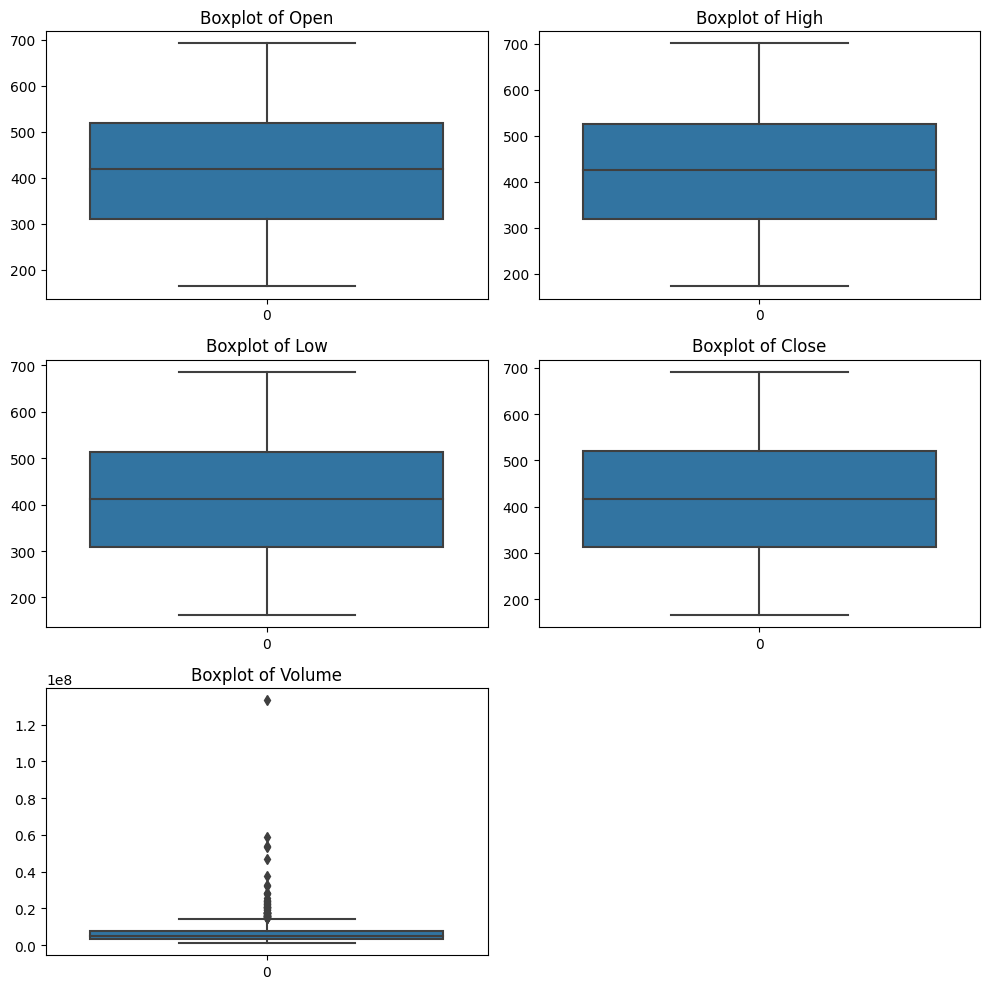

In [15]:
col_name=['Open', 'High', 'Low', 'Close', 'Volume']
fig,ax=plt.subplots(3,2,figsize=(10,10))
ax=ax.flatten()
for i,j in enumerate(col_name):
    sns.boxplot(data=data[j],ax=ax[i])
    ax[i].set_title(f'Boxplot of {j}')
for i in range(len(col_name), len(ax)):
    fig.delaxes(ax[i]) #for deleting extra empty subplots
plt.tight_layout()
plt.show()

> We see that only volume column containes outliers as it contains high and low trading on certain days

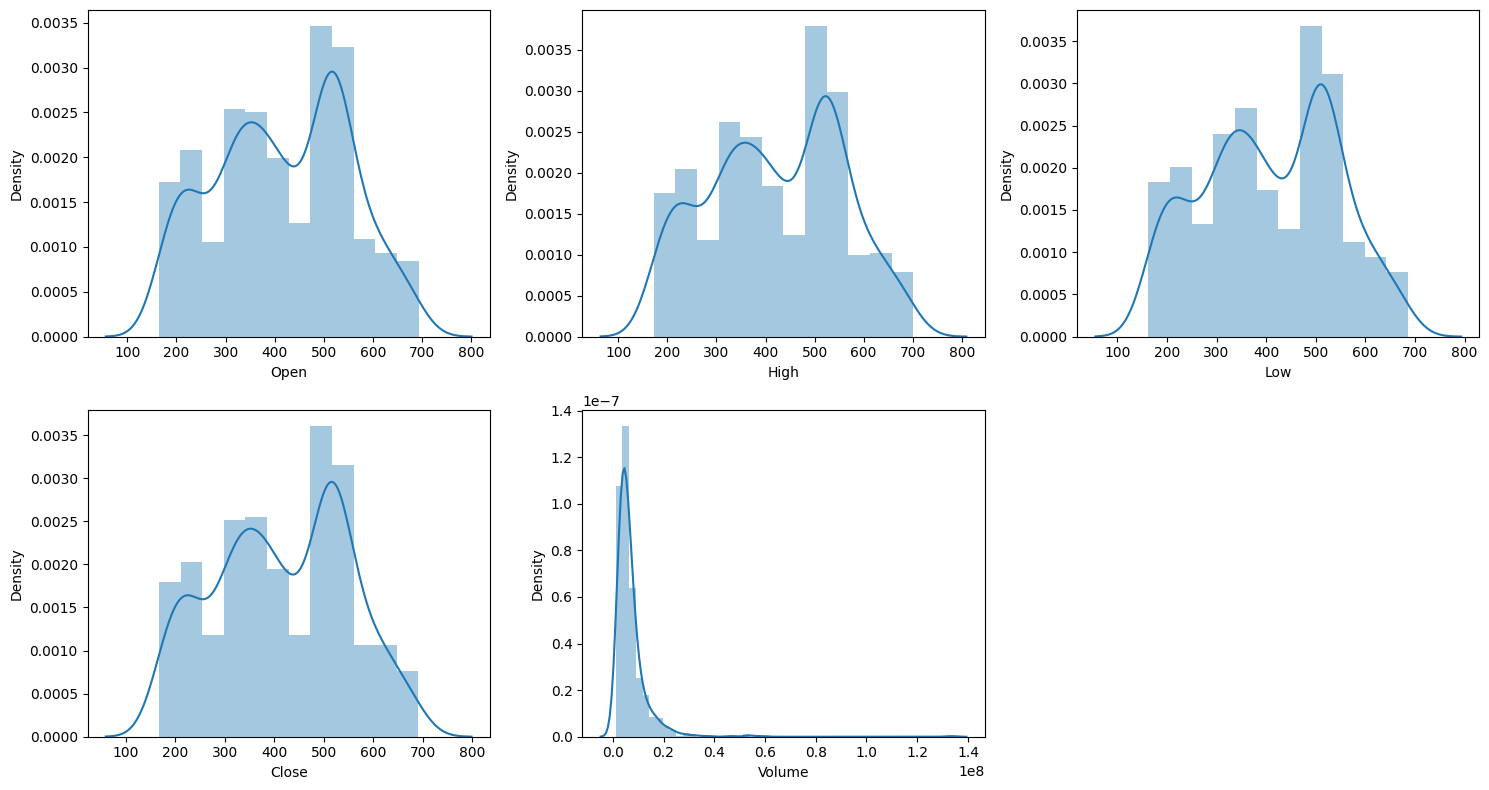

In [16]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(col_name):
    plt.subplot(2,3,i+1)
    sns.distplot(data[col])
plt.tight_layout()
plt.show()

> For Volume we see that the data is left skewed and for others there are multimodal and it seems that seasonality might be present

In [17]:
df=data.copy()
df.set_index('Date',inplace=True)
df.index.year
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-10-19,537.070007,541.799988,525.380005,530.719971,7567500
2020-10-20,528.140015,533.780029,522.260010,525.419983,10047200
2020-10-21,501.029999,506.850006,488.250000,489.049988,17405700
2020-10-22,494.690002,495.140015,482.000000,485.230011,6997900
2020-10-23,488.109985,490.059998,481.350006,488.279999,4927900


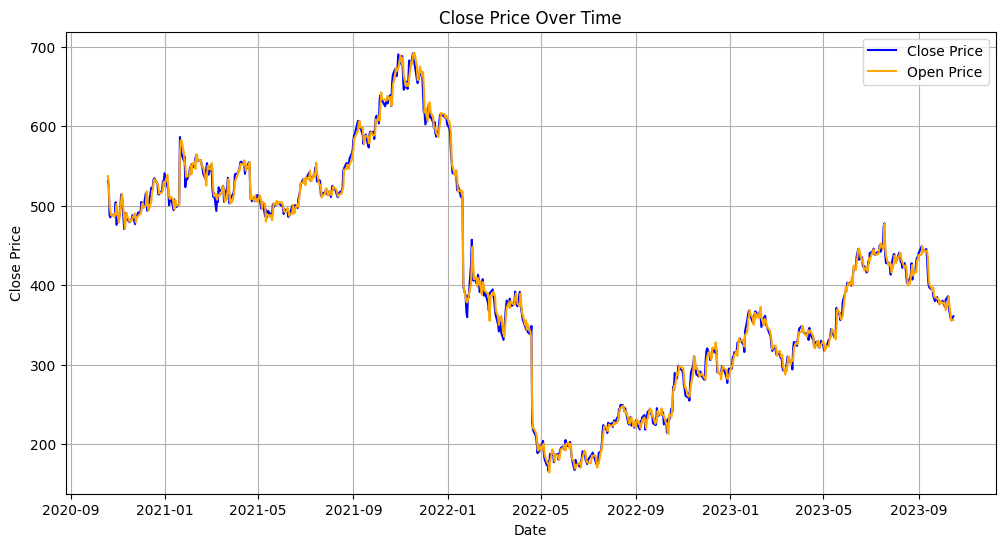

In [18]:
df.index = pd.to_datetime(df.index)

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.plot(df.index, df['Open'], label='Open Price', color='Orange')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Over Time')
plt.grid(True)
plt.legend()
plt.show()


In [19]:
df.drop(columns={'Open','High','Low','Volume'},inplace=True)

In [20]:
df.head()

,Close
Date,
2020-10-19,530.719971
2020-10-20,525.419983
2020-10-21,489.049988
2020-10-22,485.230011
2020-10-23,488.279999


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 753 entries, 2020-10-19 to 2023-10-16
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   753 non-null    float64
dtypes: float64(1)
memory usage: 11.8 KB


### Box Plot

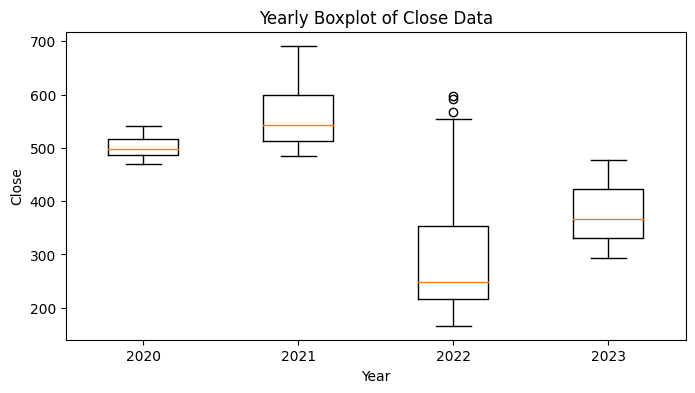

In [22]:
from pandas import DataFrame, Grouper
from matplotlib import pyplot
# Converting the index to a datetime object
df.index = pd.to_datetime(df.index)

# Group the data by year and create a list of lists for each year
groups = df.groupby(Grouper(freq='A'))# A - Annual freq
yearly_data = [group['Close'].tolist() for name, group in groups]

plt.figure(figsize=(8, 4))
plt.xlabel('Year')
plt.ylabel('Close')
plt.boxplot(yearly_data,labels=[str(name.year) for name, _ in groups],showfliers=True)
plt.title('Yearly Boxplot of Close Data')
plt.show()


> For the year 2020 we see that the spread is less which implies the data set contains fewer values
for 2020.
For 2022, the whiskers is upper stating it is righ skewed and have few outliers

In [23]:
labels=[str(name.year) for name, _ in groups]

In [24]:
labels

['2020', '2021', '2022', '2023']

### Line Plot

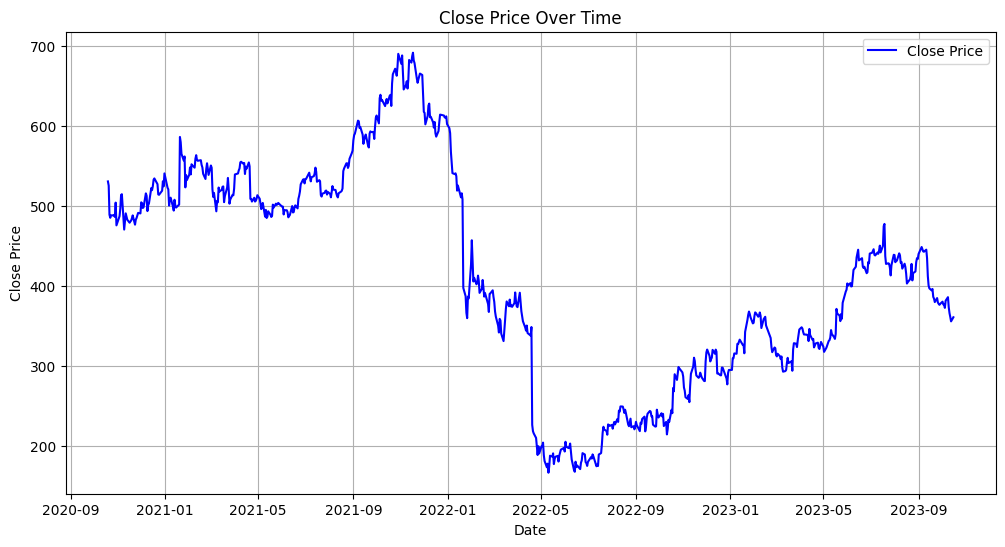

In [25]:
df.index = pd.to_datetime(df.index)

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Over Time')
plt.grid(True)
plt.legend()
plt.show()



>As noticed, around NOV 2021- MAY 2022 there is a sudden drop in price after which it reports a growth.

### Lag Plot

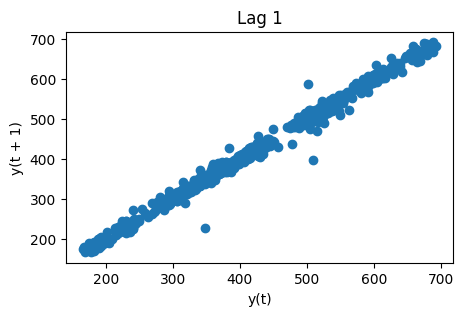

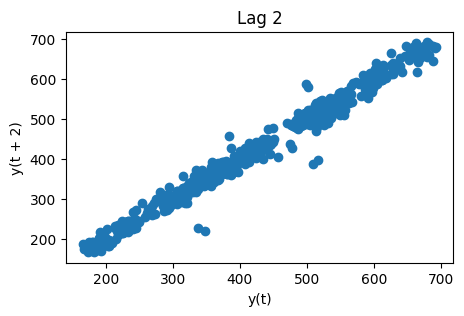

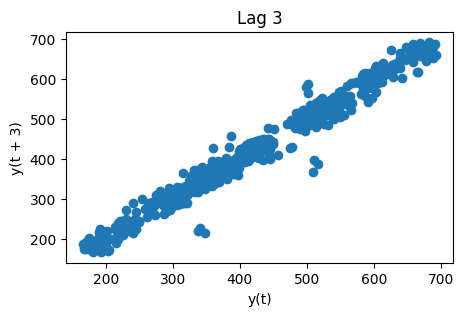

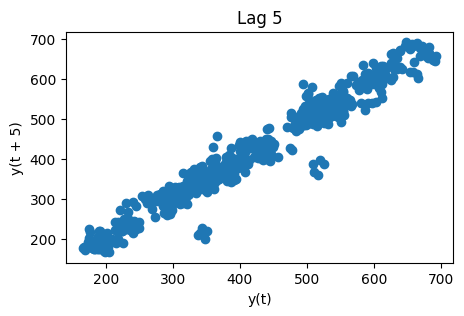

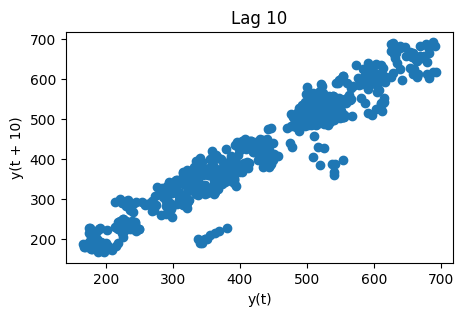

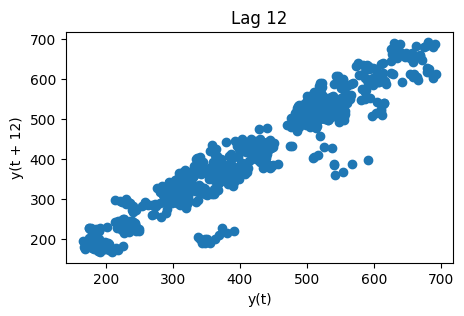

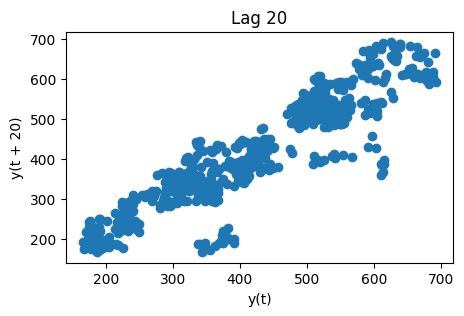

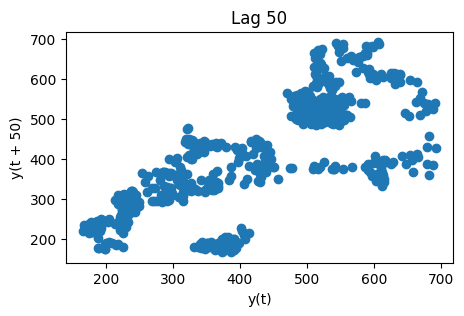

In [26]:
from pandas.plotting import lag_plot
for i in (1,2,3,5,10,12,20,50):
    fig, ax = plt.subplots(figsize=(5, 3))
    lag_plot(data['Close'], lag=i, ax=ax)
    ax.set_title(f'Lag {i}')
    plt.show()

> There is a positive correlation for lag1, lag2, and lag3 in the lag plot, it implies that the close price of the stock market data is influenced by its previous values up to three time periods.

In [27]:
#feature eng
data1=data.copy()
data1['Date'] = pd.to_datetime(data1['Date'], format='%Y-%m-%d')
data1['Date'] = pd.to_datetime(data1['Date'])
data1['Month'] = data1['Date'].dt.month
data1['Year'] = data1['Date'].dt.year
data1['DayOfWeek'] = data1['Date'].dt.weekday


data1

,Date,Open,High,Low,Close,Volume,Month,Year,DayOfWeek
0,2020-10-19,537.070007,541.799988,525.380005,530.719971,7567500,10,2020,0
1,2020-10-20,528.140015,533.780029,522.260010,525.419983,10047200,10,2020,1
2,2020-10-21,501.029999,506.850006,488.250000,489.049988,17405700,10,2020,2
3,2020-10-22,494.690002,495.140015,482.000000,485.230011,6997900,10,2020,3
4,2020-10-23,488.109985,490.059998,481.350006,488.279999,4927900,10,2020,4
...,...,...,...,...,...,...,...,...,...
748,2023-10-10,385.579987,388.700012,372.250000,373.320007,7288900,10,2023,1
749,2023-10-11,372.779999,377.809998,365.339996,365.929993,9151400,10,2023,2
750,2023-10-12,366.480011,368.829987,359.049988,361.200012,7376100,10,2023,3
751,2023-10-13,355.640015,358.929993,352.049988,355.679993,6312600,10,2023,4


> 0- Monday, 1-Tuesday, 2-Wednesday, 3-Thursday, 4-Friday

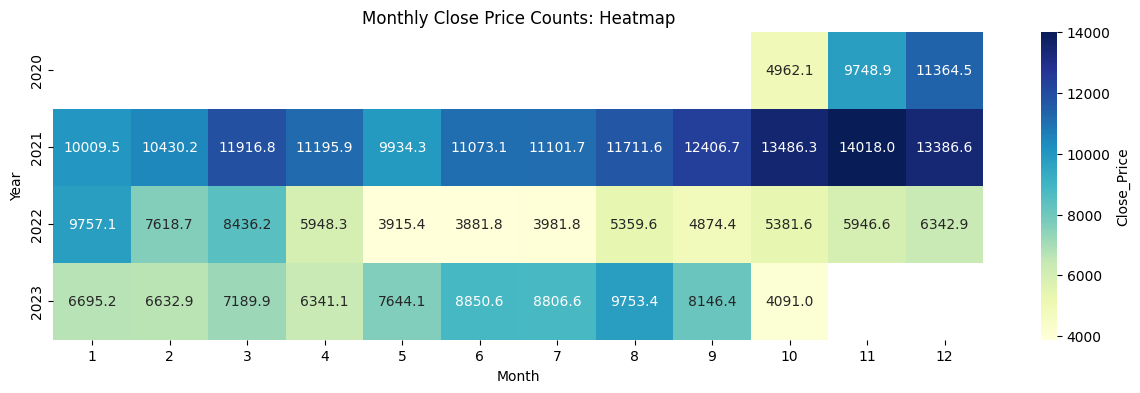

In [28]:
heatmap_data = data1.pivot_table(index='Year', columns='Month', values='Close', aggfunc='sum')

plt.figure(figsize=(15, 4))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.1f', cbar_kws={'label': 'Close_Price'})
plt.title('Monthly Close Price Counts: Heatmap')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

> The heatmap above illustrates that in 2021, the closing prices of the stock market performed more
favorably than they did in 2022 and 2023.

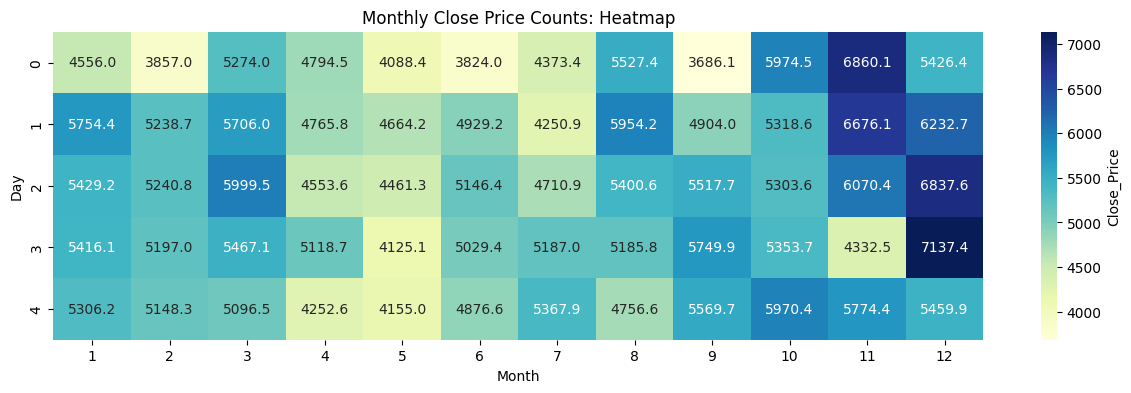

In [29]:

heatmap_data = data1.pivot_table(index='DayOfWeek', columns='Month', values='Close', aggfunc='sum')

plt.figure(figsize=(15, 4))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.1f', cbar_kws={'label': 'Close_Price'})
plt.title('Monthly Close Price Counts: Heatmap')
plt.xlabel('Month')
plt.ylabel('Day')
plt.show()


>This shows that typically, during the months of October and December, the closing prices remain  high throughout all weekdays.

### Time series decomposition plot

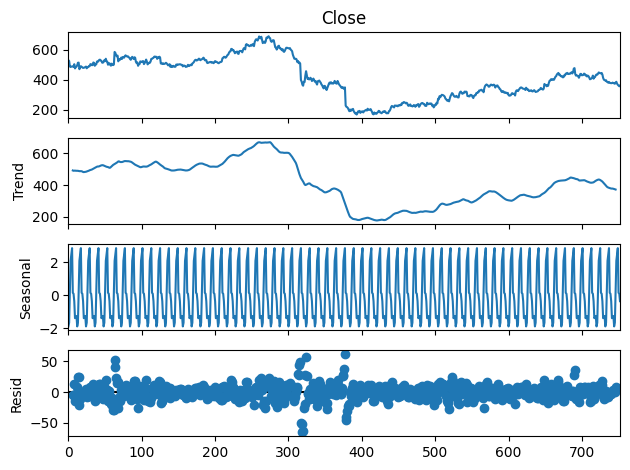

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(data["Close"],period=12)
decompose_ts_add.plot()
plt.show()

> we observe the seasonality in the data

In [31]:
price=pd.DataFrame()


### Auto - Correlation Plot

<Figure size 500x400 with 0 Axes>

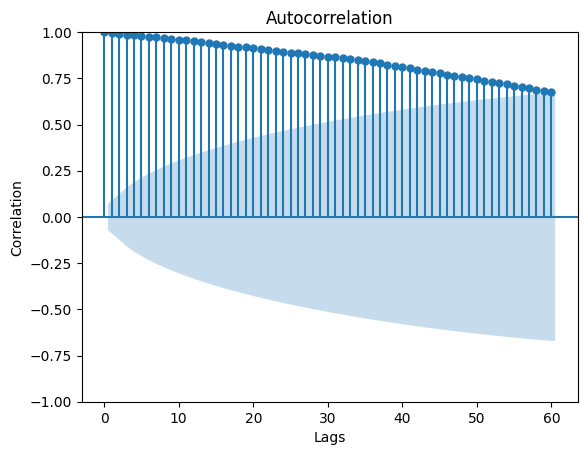

In [32]:
#ACF - correlation of y with its lags
import statsmodels.graphics.tsaplots as tsa_plots
plt.figure(figsize=(5,4))
tsa_plots.plot_acf(data.Close,lags=60)
plt.ylabel('Correlation')
plt.xlabel('Lags')
plt.show()

> We see that the value of auto-correlation at lag 0 is 1(i.e, correlation with itself). The
autocorrelation upto 58 lags lie outside the blue region(CI) which means values are statistically
significant upto lag58 i.e, they affect the stock price.

In [33]:

from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Close'])

# Extract and print the p-value
p_value = result[1]
print(f'ADF Test p-value: {p_value}')

# Interpret the result
if p_value <= 0.05:
    print('The p-value is less than or equal to 0.05. Reject the null hypothesis. The data is likely stationary.')
else:
    print('The p-value is greater than 0.05. Fail to reject the null hypothesis. The data may not be stationary.')


ADF Test p-value: 0.6196006837361439
The p-value is greater than 0.05. Fail to reject the null hypothesis. The data may not be stationary.


In [34]:
df.head()

,Close
Date,
2020-10-19,530.719971
2020-10-20,525.419983
2020-10-21,489.049988
2020-10-22,485.230011
2020-10-23,488.279999


In [35]:
#arranging in ascending order
stock_price=df.sort_index(axis=0,ascending=True)
stock_price.head()

,Close
Date,
2020-10-19,530.719971
2020-10-20,525.419983
2020-10-21,489.049988
2020-10-22,485.230011
2020-10-23,488.279999


In [36]:
#
start = stock_price.index[0].date()
end = stock_price.index[-1].date()
new_dates = pd.date_range(start=start,end=end,freq='D')
stock_price = stock_price.reindex(new_dates)
stock_price = stock_price.rename_axis('Date')

In [37]:
new_dates

DatetimeIndex(['2020-10-19', '2020-10-20', '2020-10-21', '2020-10-22',
               '2020-10-23', '2020-10-24', '2020-10-25', '2020-10-26',
               '2020-10-27', '2020-10-28',
               ...
               '2023-10-07', '2023-10-08', '2023-10-09', '2023-10-10',
               '2023-10-11', '2023-10-12', '2023-10-13', '2023-10-14',
               '2023-10-15', '2023-10-16'],
              dtype='datetime64[ns]', length=1093, freq='D')

In [38]:
stock_price.tail(5)

,Close
Date,
2023-10-12,361.200012
2023-10-13,355.679993
2023-10-14,NaN
2023-10-15,NaN
2023-10-16,360.820007


In [39]:
#filling the missing values with the above entries
stock_price['Close']=stock_price['Close'].fillna(method ='ffill')
stock_price.tail(5)

,Close
Date,
2023-10-12,361.200012
2023-10-13,355.679993
2023-10-14,355.679993
2023-10-15,355.679993
2023-10-16,360.820007


In [40]:
stock_price.shape

(1093, 1)

In [41]:
#splitting the data to test and train
train_size=int(80*len(stock_price)/100)

train_data = stock_price.iloc[:train_size]
test_data = stock_price.iloc[train_size:]

In [42]:
train_data

,Close
Date,
2020-10-19,530.719971
2020-10-20,525.419983
2020-10-21,489.049988
2020-10-22,485.230011
2020-10-23,488.279999
...,...
2023-03-07,308.470001
2023-03-08,311.790009
2023-03-09,297.779999


In [43]:
train_size

874

In [44]:
print('Train data = ',train_data.shape)
print('Test data = ',test_data.shape)

Train data =  (874, 1)
Test data =  (219, 1)


In [45]:
def test_stationarity(timeseries):

    #Determine rolling statistics

    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

    #Plot rolling statistics
    plt.figure(figsize=(9,5))
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='green',label='Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)

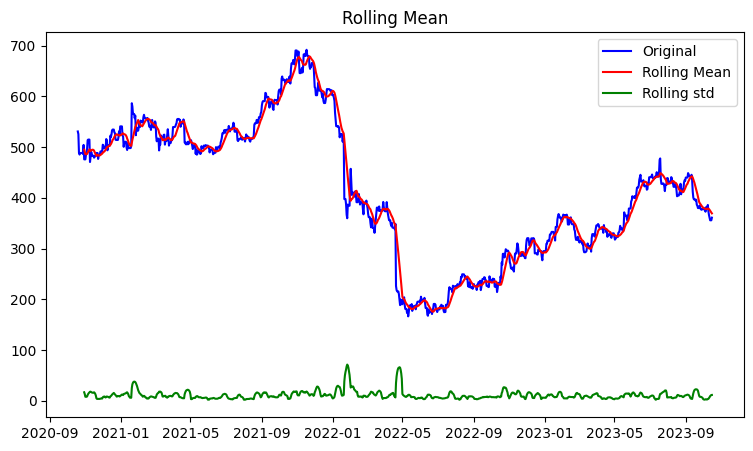

In [46]:
test_stationarity(stock_price)

In [47]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(stock_price['Close'])

# Extract and print the p-value
p_value = result[1]
print(f'ADF Test p-value: {p_value}')

# Interpret the result
if p_value <= 0.05:
    print('The p-value is less than or equal to 0.05. Reject the null hypothesis. The data is likely stationary.')
else:
    print('The p-value is greater than 0.05. Accept the null hypothesis. The data may not be stationary.')

ADF Test p-value: 0.6425741404368839
The p-value is greater than 0.05. Accept the null hypothesis. The data may not be stationary.


In [48]:
def adf_test(a):
    result = adfuller(a)
    # Extract and print the p-value
    p_value = result[1]
    print(f'ADF Test p-value: {p_value}')

    # Interpret the result
    if p_value <= 0.05:
        print('The p-value is less than or equal to 0.05. Reject the null hypothesis. The data is likely stationary.')
    else:
        print('The p-value is greater than 0.05. Accept the null hypothesis. The data may not be stationary.')


#### Log Transformation

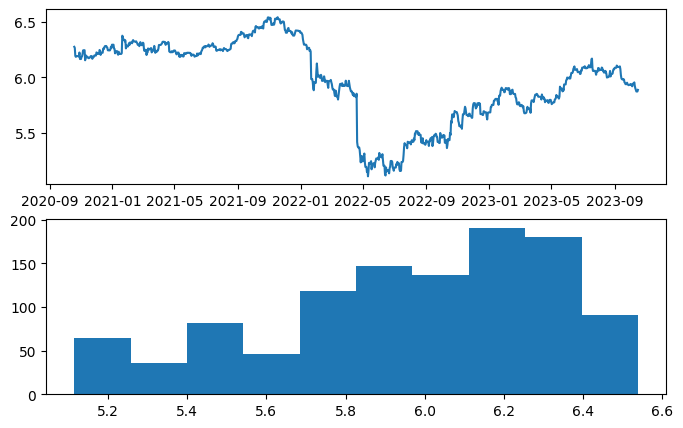

ADF Test p-value: 0.597480965964351
The p-value is greater than 0.05. Accept the null hypothesis. The data may not be stationary.


In [49]:
log = pd.DataFrame()
log = stock_price[['Close']]
log['Close'] = np.log(log['Close'])

# line chart
fig=plt.figure(figsize=(8,5))
plt.subplot(211)
plt.plot(log['Close'])
#Histogram
plt.subplot(212)
plt.hist(log['Close'])
plt.show()

adf_test(log)

### Square root Transformation

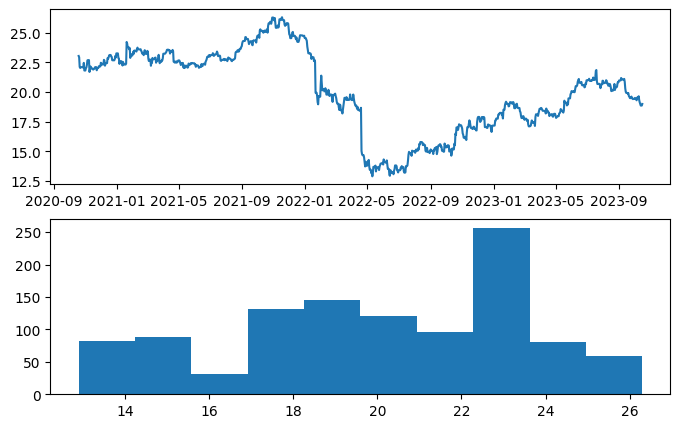

ADF Test p-value: 0.6134170845065436
The p-value is greater than 0.05. Accept the null hypothesis. The data may not be stationary.


In [50]:
square_root= pd.DataFrame()
square_root =stock_price[['Close']]
square_root['Close'] = np.sqrt(square_root.Close)

# line chart
fig=plt.figure(figsize=(8,5))
plt.subplot(211)
plt.plot(square_root['Close'])
#Histogram
plt.subplot(212)
plt.hist(square_root['Close'])
plt.show()

adf_test(square_root)

### Differencing

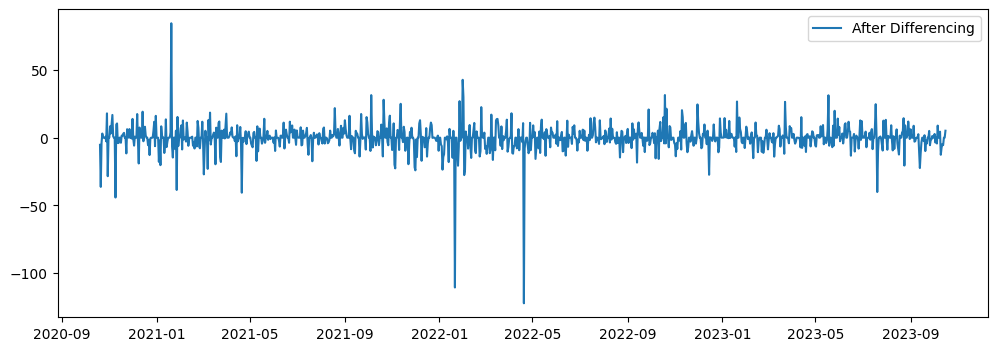

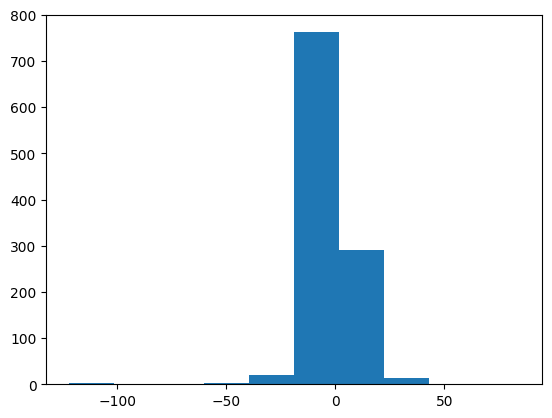

In [51]:
#since it is not stationaery we need to difference the same
diff=stock_price.copy()
diff['Diff_close']=stock_price['Close'].diff()
diff.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(diff['Diff_close'], label='After Differencing')
plt.legend(loc='best')
plt.show()

#Histogram
plt.hist(diff['Diff_close'])
plt.show()


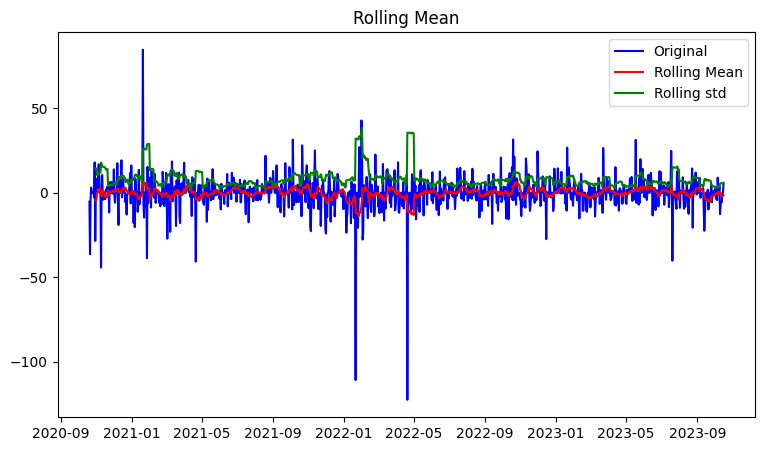

ADF Test p-value: 5.581568201854549e-12
The p-value is less than or equal to 0.05. Reject the null hypothesis. The data is likely stationary.


In [52]:
test_stationarity(diff['Diff_close'])
adf_test(diff['Diff_close'])

> The data is stationary we use this for further analysis

In [53]:
diff.head(7)

,Close,Diff_close
Date,,
2020-10-20,525.419983,-5.299988
2020-10-21,489.049988,-36.369995
2020-10-22,485.230011,-3.819977
2020-10-23,488.279999,3.049988
2020-10-24,488.279999,0.000000
2020-10-25,488.279999,0.000000
2020-10-26,488.239990,-0.040009


### <span style=color:purple>Forecasting using Different Model <span>

In [54]:
#creating dummy variables
diff['t'] = np.arange(1,len(diff)+1)
diff['t_squared'] = np.square(diff.t)
diff['log_close'] = np.log(diff['Close'])
diff.head(5)

,Close,Diff_close,t,t_squared,log_close
Date,,,,,
2020-10-20,525.419983,-5.299988,1,1,6.264198
2020-10-21,489.049988,-36.369995,2,4,6.192465
2020-10-22,485.230011,-3.819977,3,9,6.184623
2020-10-23,488.279999,3.049988,4,16,6.190889
2020-10-24,488.279999,0.000000,5,25,6.190889


In [55]:
#Data Spiliting
diff_train_size=int(80*len(diff)/100)

#Splitting data into Train and Test
diff_train_data = diff.iloc[:diff_train_size]
diff_test_data = diff.iloc[diff_train_size:]

In [56]:
#Function to inverse Difference Series
def diff_inverse(series_diff):
    series_inverted = series_diff.cumsum()
  # Adding first datapoint as we shifted series
    series_inverted = series_inverted.add(test_data.Close[0])
    series_inverted.Close[0]=test_data.Close[0]

    return series_inverted

### MAPE - Mean Absolute Percent Error (Evaluation Metric)

In [57]:
def MAPE(pred,org):                     # pred = predicted, org = original
    ape = np.abs((pred-org)/org)*100    # ape = absolute percent error
    return np.mean(ape).round(3)

### RMSE - Root Mean Square Error (Evaluation Metric)

In [58]:
def RMSE(pred,org):
    MSE = np.square(np.subtract(org,pred)).mean()
    rmse = np.sqrt(MSE)
    return rmse.round(3)

### Linear Model

In [59]:
import statsmodels.formula.api as smf

#Linear Model
linear_model = smf.ols('Diff_close~t',data=diff_train_data).fit()
pred_linear=pd.DataFrame()
pred_linear['Close'] =  pd.Series(linear_model.predict(pd.DataFrame(diff_test_data['t'])))

pred_linear=diff_inverse(pred_linear)

In [60]:
pred_linear.head()

,Close
Date,
2023-03-12,292.760010
2023-03-13,292.078067
2023-03-14,291.736862
2023-03-15,291.395500
2023-03-16,291.053981


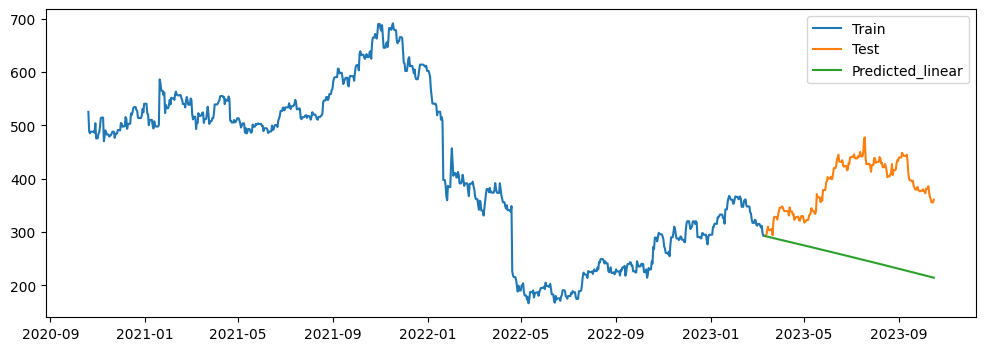

In [61]:
#Ploting of training, testing and Predicted data
plt.figure(figsize=(12,4))
plt.plot(diff_train_data['Close'], label='Train')
plt.plot(diff_test_data['Close'], label='Test')
plt.plot(pred_linear, label='Predicted_linear')
plt.legend(loc='best')
plt.show()

In [62]:
linear_mape= MAPE(pred_linear['Close'],test_data['Close'])
linear_rmse= RMSE(pred_linear['Close'],test_data['Close'])
print('MAPE = ',linear_mape)
print('RMSE = ',linear_rmse)

MAPE =  32.849
RMSE =  147.011


### Exponential Model

In [63]:
exp_model = smf.ols('log_close~t',data=diff_train_data).fit()
pred_exp=pd.DataFrame()
pred_exp['Close'] =  pd.Series(exp_model.predict(pd.DataFrame(diff_test_data['t'])))
pred_exp=diff_inverse(pred_exp)

In [64]:
pred_exp.head()

,Close
Date,
2023-03-12,292.760010
2023-03-13,303.727685
2023-03-14,309.209852
2023-03-15,314.690905
2023-03-16,320.170843


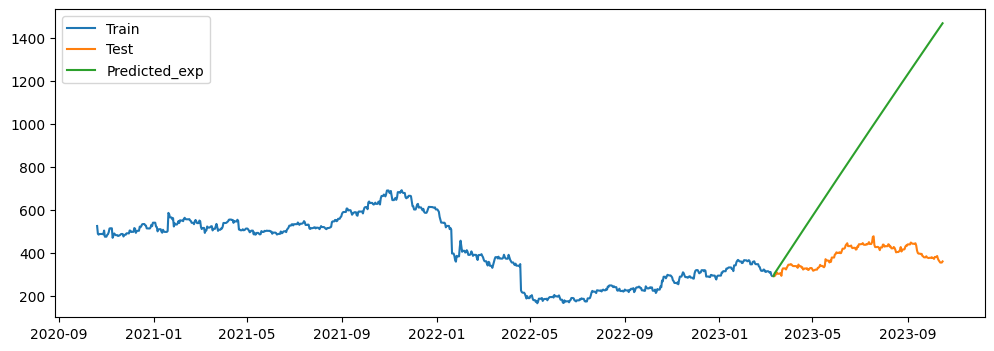

In [65]:
plt.figure(figsize=(12,4))
plt.plot(diff_train_data['Close'], label='Train')
plt.plot(diff_test_data['Close'], label='Test')
plt.plot(pred_exp, label='Predicted_exp')
plt.legend(loc='best')
plt.show()

In [66]:
exp_mape= MAPE(pred_exp['Close'],test_data['Close'])
exp_rmse= RMSE(pred_exp['Close'],test_data['Close'])
print('MAPE = ',exp_mape)
print('RMSE = ',exp_rmse)

MAPE =  125.328
RMSE =  589.428


### Quadratic Model

In [67]:
quad_model = smf.ols('Diff_close~t+t_squared',data=diff_test_data).fit()
pred_quad=pd.DataFrame()
pred_quad['Close'] = pd.Series(quad_model.predict(diff_test_data[["t","t_squared"]]))
pred_quad=diff_inverse(pred_quad)

In [68]:
pred_quad.head()

,Close
Date,
2023-03-12,292.760010
2023-03-13,295.085827
2023-03-14,296.258461
2023-03-15,297.437314
2023-03-16,298.622185


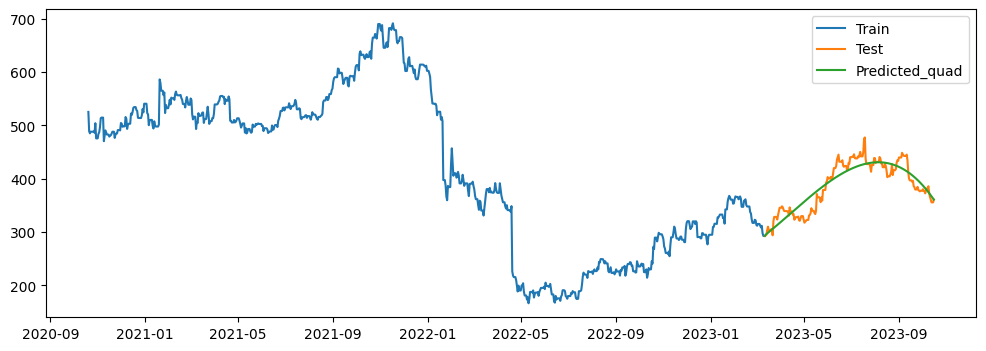

In [69]:
plt.figure(figsize=(12,4))
plt.plot(diff_train_data['Close'], label='Train')
plt.plot(diff_test_data['Close'], label='Test')
plt.plot(pred_quad, label='Predicted_quad')
plt.legend(loc='best')
plt.show()

In [70]:
quad_mape= MAPE(pred_quad['Close'],test_data['Close'])
quad_rmse= RMSE(pred_quad['Close'],test_data['Close'])
print('MAPE = ',quad_mape)
print('RMSE = ',quad_rmse)

MAPE =  4.046
RMSE =  18.71


### Simple Exponential Model

In [71]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

best_mape = float('inf')  # Initialize best MAPE with a high value
best_smoothing_level = None #None later update

for i in np.linspace(0.1, 1, 20):
    se_model = SimpleExpSmoothing(diff_train_data["Close"]).fit(smoothing_level=i)
    pred_se=pd.DataFrame()
    pred_se = se_model.predict(start=diff_test_data.index[0], end=diff_test_data.index[-1])
    score = MAPE(pred_se, diff_test_data.Close)

    if score < best_mape:
        best_mape = score
        best_smoothing_level = i

print("Best smoothing_level:", best_smoothing_level)
print("Best MAPE Error:", best_mape)



Best smoothing_level: 0.1
Best MAPE Error: 17.819


/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress

In [72]:
pred_se.head()

2023-03-12    292.76001
2023-03-13    292.76001
2023-03-14    292.76001
2023-03-15    292.76001
2023-03-16    292.76001
Freq: D, dtype: float64

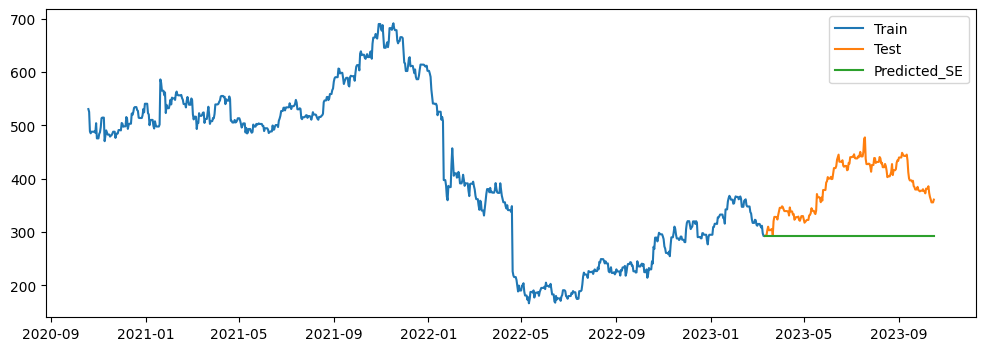

In [73]:
plt.figure(figsize=(12,4))
plt.plot(train_data['Close'], label='Train')
plt.plot(test_data['Close'], label='Test')
plt.plot(pred_se, label='Predicted_SE')
plt.legend(loc='best')
plt.show()

In [74]:
se_mape= MAPE(pred_se,test_data.Close)
se_rmse= RMSE(pred_se,test_data.Close)
print('MAPE = ',se_mape)
print('RMSE = ',se_rmse)

MAPE =  23.172
RMSE =  104.878


### Double Exponential Smoothing

In [75]:
best_mape = float('inf')  # Initialize best MAPE with a high value
best_smoothing_level = None
best_smoothing_slope = None

for i in np.arange(0.1, 1, 0.9/10):
    for j in np.arange(0.1, 1, 0.9/10):
        de_model = Holt(diff_train_data["Close"]).fit(smoothing_level=i, smoothing_slope=j)
        pred_de = de_model.predict(start=diff_test_data.index[0], end=diff_test_data.index[-1])
        score = MAPE(pred_de, diff_test_data.Close)

        if score < best_mape:
            best_mape = score
            best_smoothing_level = i
            best_smoothing_slope = j

print("Best smoothing_level:", best_smoothing_level)
print("Best smoothing_slope:", best_smoothing_slope)
print("Best MAPE Error:", best_mape)


/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress

Best smoothing_level: 0.1
Best smoothing_slope: 0.73
Best MAPE Error: 46.351


In [76]:
 pred_de.head()

2023-03-12    291.174405
2023-03-13    290.267651
2023-03-14    289.360898
2023-03-15    288.454144
2023-03-16    287.547391
Freq: D, dtype: float64

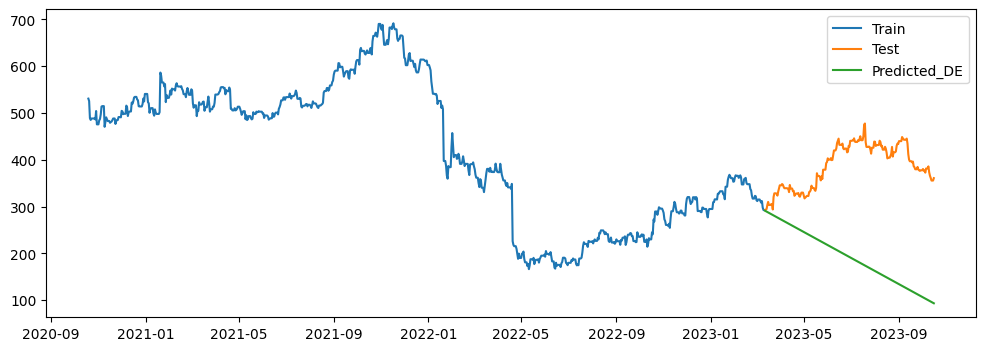

In [77]:
plt.figure(figsize=(12,4))
plt.plot(train_data['Close'], label='Train')
plt.plot(test_data['Close'], label='Test')
plt.plot(pred_de, label='Predicted_DE')
plt.legend(loc='best')
plt.show()

In [78]:
de_mape= MAPE(pred_de,test_data.Close)
de_rmse= RMSE(pred_de,test_data.Close)
print('MAPE = ',de_mape)
print('RMSE = ',de_rmse)

MAPE =  48.268
RMSE =  215.916


### Holt Winter's Exponential

In [79]:
hwe_model_add_add = ExponentialSmoothing(diff_train_data["Close"],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = diff_test_data.index[0],end = diff_test_data.index[-1])
MAPE(pred_hwe_add_add,diff_test_data.Close)

30.108

In [80]:
hwe_model_add_add.forecast(10)

2023-03-12    293.943043
2023-03-13    291.947728
2023-03-14    290.505536
2023-03-15    292.339766
2023-03-16    292.266796
2023-03-17    289.990205
2023-03-18    289.695215
2023-03-19    289.787938
2023-03-20    288.037606
2023-03-21    288.207739
Freq: D, dtype: float64

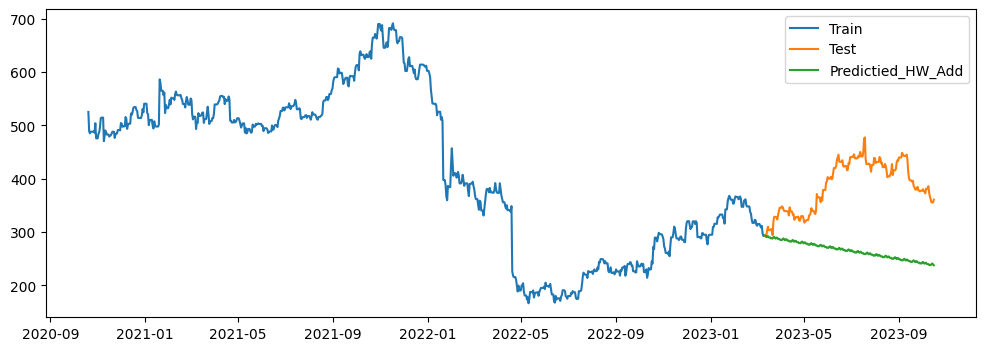

In [81]:
plt.figure(figsize=(12,4))
plt.plot(diff_train_data['Close'], label='Train')
plt.plot(diff_test_data['Close'], label='Test')
plt.plot(pred_hwe_add_add, label='Predictied_HW_Add')
plt.legend(loc='best')
plt.show()

In [82]:
hwe_add_mape= MAPE(pred_hwe_add_add,test_data.Close)
hwe_add_rmse= RMSE(pred_hwe_add_add,test_data.Close)
print('MAPE = ',hwe_add_mape)
print('RMSE = ',hwe_add_rmse)

MAPE =  30.108
RMSE =  134.655


In [83]:
hwe_model_mul_mul = ExponentialSmoothing(diff_train_data["Close"],seasonal="mul",trend="mul",seasonal_periods=12).fit()
pred_hwe_mul_mul = hwe_model_mul_mul.predict(start = diff_test_data.index[0],end = diff_test_data.index[-1])
MAPE(pred_hwe_mul_mul,diff_test_data.Close)

9.278

In [84]:
pred_hwe_mul_mul.head()

2023-03-12    294.418626
2023-03-13    293.795721
2023-03-14    294.159754
2023-03-15    296.663010
2023-03-16    295.916758
Freq: D, dtype: float64

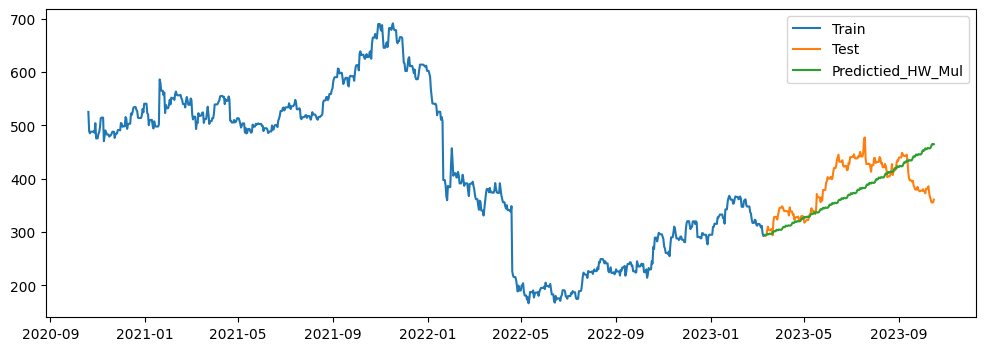

In [85]:
plt.figure(figsize=(12,4))
plt.plot(diff_train_data['Close'], label='Train')
plt.plot(diff_test_data['Close'], label='Test')
plt.plot(pred_hwe_mul_mul, label='Predictied_HW_Mul')
plt.legend(loc='best')
plt.show()

In [86]:
hwe_mul_mape= MAPE(pred_hwe_mul_mul,test_data.Close)
hwe_mul_rmse= RMSE(pred_hwe_mul_mul,test_data.Close)
print('MAPE = ',hwe_mul_mape)
print('RMSE = ',hwe_mul_rmse)

MAPE =  9.278
RMSE =  45.907


### ARIMA Model

In [87]:
#As seasonality is must in ARIMA model we are creating a new dataframe which contains only data and Diff_close
arima_data=diff[['Diff_close']]
arima_data.tail()

,Diff_close
Date,
2023-10-12,-4.729981
2023-10-13,-5.520019
2023-10-14,0.000000
2023-10-15,0.000000
2023-10-16,5.140014


In [88]:
arima_data.shape

(1092, 1)

In [89]:
train_size

874

In [90]:
split_point = len(arima_data) - 218
dataset, validation = arima_data[0:split_point], arima_data[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=True)
validation.to_csv('validation.csv', header=False)

Dataset 874, Validation 218


In [ ]:
# arima_train_data=arima_data[:train_size]
# arima_test_data= arima_data[train_size:]

In [ ]:
# arima_train_data.shape, arima_test_data.shape

In [ ]:
#Hyperparameters

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# evaluate an ARIMA model for a given order (p=2,d=4,q=3) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.80)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train] # all the training data will be strored inside a list
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse


# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e :
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))



# load dataset
train = pd.read_csv('dataset.csv', index_col=0, parse_dates=True, squeeze=True)
# train = pd.read_csv('dataset.csv', index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 4)
d_values = range(0, 2)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=7.598
ARIMA(0, 0, 1) RMSE=7.597
ARIMA(0, 0, 2) RMSE=7.660
ARIMA(0, 0, 3) RMSE=7.669
ARIMA(0, 0, 4) RMSE=7.638
ARIMA(0, 1, 0) RMSE=10.567
ARIMA(0, 1, 1) RMSE=7.623
ARIMA(0, 1, 2) RMSE=7.625
ARIMA(0, 1, 3) RMSE=7.681
ARIMA(0, 1, 4) RMSE=7.694
ARIMA(1, 0, 0) RMSE=7.597
ARIMA(1, 0, 1) RMSE=7.622
ARIMA(1, 0, 2) RMSE=7.665
ARIMA(1, 0, 3) RMSE=7.668
ARIMA(1, 0, 4) RMSE=7.640
ARIMA(1, 1, 0) RMSE=9.060
ARIMA(1, 1, 1) RMSE=7.624
ARIMA(1, 1, 2) RMSE=7.637
ARIMA(1, 1, 3) RMSE=7.640
ARIMA(1, 1, 4) RMSE=7.697
ARIMA(2, 0, 0) RMSE=7.661
ARIMA(2, 0, 1) RMSE=7.666
ARIMA(2, 0, 2) RMSE=7.527
ARIMA(2, 0, 3) RMSE=7.541
ARIMA(2, 0, 4) RMSE=7.559
ARIMA(2, 1, 0) RMSE=8.792
ARIMA(2, 1, 1) RMSE=7.680
ARIMA(2, 1, 2) RMSE=7.649
ARIMA(2, 1, 3) RMSE=7.594
ARIMA(2, 1, 4) RMSE=7.552
ARIMA(3, 0, 0) RMSE=7.669
ARIMA(3, 0, 1) RMSE=7.665
ARIMA(3, 0, 2) RMSE=7.555
ARIMA(3, 0, 3) RMSE=7.556
ARIMA(3, 0, 4) RMSE=7.518
ARIMA(3, 1, 0) RMSE=8.280
ARIMA(3, 1, 1) RMSE=7.692
ARIMA(3, 1, 2) RMSE=7.705
ARIMA(3, 1,

In [91]:
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [92]:
train = pd.read_csv('dataset.csv', index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [93]:
train.tail()

,Diff_close
Date,
2023-03-08,3.320008
2023-03-09,-14.010010
2023-03-10,-5.019989
2023-03-11,0.000000
2023-03-12,0.000000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


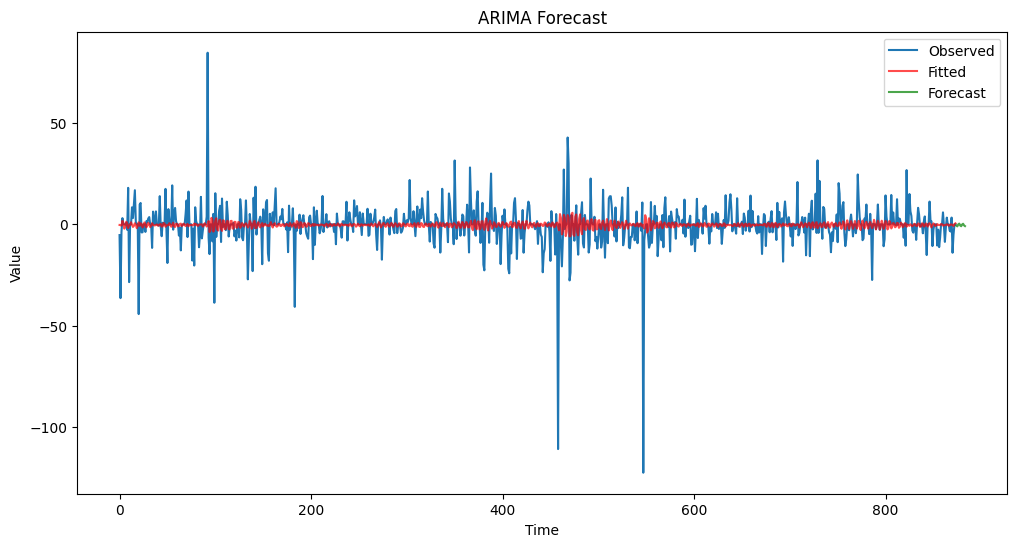

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Define or load your time series data as 'X' (replace with your actual data)
# X = pd.read_csv('your_data.csv', index_col='date_column', parse_dates=True, squeeze=True)

# Fit an ARIMA model
model = ARIMA(X, order=(3, 0, 4))
model_fit = model.fit()

# Make a 10-step ahead forecast
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the observed data and fitted values
plt.figure(figsize=(12, 6))
plt.plot(X, label='Observed')
plt.plot(model_fit.fittedvalues, color='red', label='Fitted', alpha=0.7)
plt.legend(loc='best')

# Plot the forecasted values
forecast_index = np.arange(len(X), len(X) + forecast_steps)
plt.plot(forecast_index, forecast, color='green', label='Forecast', alpha=0.7)

plt.title('ARIMA Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()



In [95]:
model = ARIMA(X, order=(3, 0, 4))
model_fit = model.fit()

# Make a 10-step ahead forecast
forecast_steps = 218
forecast = model_fit.forecast(steps=forecast_steps)

# Convert the forecasted values to a Pandas DataFrame
forecast_df = pd.DataFrame({'Close': forecast})

# Print the DataFrame
print(forecast_df)

        Close
0   -0.658778
1   -1.024206
2    0.001610
3    0.362698
4   -0.588650
..        ...
213 -0.312185
214 -0.313028
215 -0.313030
216 -0.312242
217 -0.312220

[218 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [96]:
forecast_df=diff_inverse(forecast_df)

In [97]:
forecast_df.tail()

,Close
213,225.317220
214,225.004192
215,224.691162
216,224.378920
217,224.066700


In [98]:
forecast_df = forecast_df.iloc[:, 0]

# Create the forecasted_data DataFrame
forecasted_data = pd.DataFrame({
    'Date': pd.date_range(start='2023-03-13', periods=len(forecast_df), freq='D'),
    'Close': forecast_df
})
forecasted_data.tail()


,Date,Close
213,2023-10-12,225.317220
214,2023-10-13,225.004192
215,2023-10-14,224.691162
216,2023-10-15,224.378920
217,2023-10-16,224.066700


In [99]:
forecasted_data.set_index('Date',inplace=True)
forecasted_data.index.date

array([datetime.date(2023, 3, 13), datetime.date(2023, 3, 14),
       datetime.date(2023, 3, 15), datetime.date(2023, 3, 16),
       datetime.date(2023, 3, 17), datetime.date(2023, 3, 18),
       datetime.date(2023, 3, 19), datetime.date(2023, 3, 20),
       datetime.date(2023, 3, 21), datetime.date(2023, 3, 22),
       datetime.date(2023, 3, 23), datetime.date(2023, 3, 24),
       datetime.date(2023, 3, 25), datetime.date(2023, 3, 26),
       datetime.date(2023, 3, 27), datetime.date(2023, 3, 28),
       datetime.date(2023, 3, 29), datetime.date(2023, 3, 30),
       datetime.date(2023, 3, 31), datetime.date(2023, 4, 1),
       datetime.date(2023, 4, 2), datetime.date(2023, 4, 3),
       datetime.date(2023, 4, 4), datetime.date(2023, 4, 5),
       datetime.date(2023, 4, 6), datetime.date(2023, 4, 7),
       datetime.date(2023, 4, 8), datetime.date(2023, 4, 9),
       datetime.date(2023, 4, 10), datetime.date(2023, 4, 11),
       datetime.date(2023, 4, 12), datetime.date(2023, 4, 13),
 

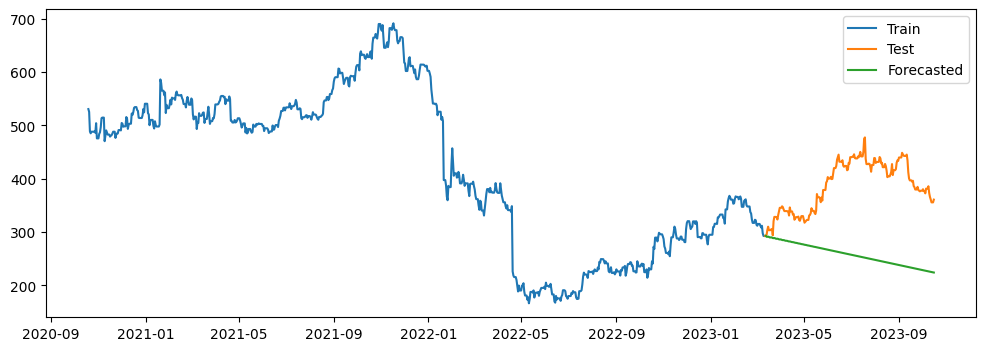

In [100]:
plt.figure(figsize=(12,4))
plt.plot(train_data['Close'], label='Train')
plt.plot(test_data['Close'], label='Test')
plt.plot(forecasted_data, label='Forecasted')
plt.legend(loc='best')
plt.show()

In [101]:
arima_mape= MAPE(forecasted_data['Close'][diff_test_data.index.min():],test_data.Close)
arima_rmse= RMSE(forecasted_data['Close'][diff_test_data.index.min():],test_data.Close)
print('MAPE = ',arima_mape)
print('RMSE = ',arima_rmse)

MAPE =  31.968
RMSE =  142.659


### SARIMA Model

In [102]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_S = SARIMAX(diff_train_data.Close, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_S_fit = model_S.fit()

# Make predictions on the testing data
predictions = model_S_fit.predict(start=len(diff_train_data), end=len(diff_train_data) + len(diff_test_data) - 1, dynamic=False)


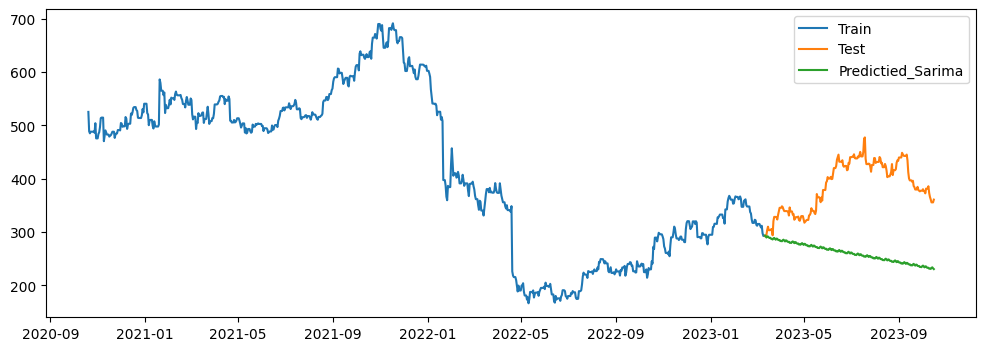

In [103]:
plt.figure(figsize=(12,4))
plt.plot(diff_train_data['Close'], label='Train')
plt.plot(diff_test_data['Close'], label='Test')
plt.plot(predictions, label='Predictied_Sarima')
plt.legend(loc='best')
plt.show()

In [104]:
sarima_mape= MAPE(predictions,test_data.Close)
sarima_rmse= RMSE(predictions,test_data.Close)
print('MAPE = ',sarima_mape)
print('RMSE = ',sarima_rmse)

MAPE =  31.189
RMSE =  139.106


### FBProphet Model

In [105]:
pip install Cython


In [106]:
!pip install prophet

In [107]:
from prophet import Prophet

In [108]:
data.head(2)

,Date,Open,High,Low,Close,Volume
0,2020-10-19,537.070007,541.799988,525.380005,530.719971,7567500
1,2020-10-20,528.140015,533.780029,522.260010,525.419983,10047200


In [109]:
fb_data=data.copy()
fb_data.drop(columns={'Open','High','Low','Volume'},inplace=True)
fb_data.head(5)

,Date,Close
0,2020-10-19,530.719971
1,2020-10-20,525.419983
2,2020-10-21,489.049988
3,2020-10-22,485.230011
4,2020-10-23,488.279999


In [110]:
m= Prophet()
fb_data.columns=['ds','y']

In [111]:
#Spiliting data as train and test
train_size=int(80*len(fb_data)/100)

#Splitting data into Train and Test
fb_train_data = fb_data.iloc[:train_size]
fb_test_data = fb_data.iloc[train_size:]

In [112]:
#Model Building
prophet_model = Prophet()
prophet_model.fit(fb_train_data)
#Prediction
pred_fbp=fb_test_data.copy()
pred_fbp=prophet_model.predict(fb_test_data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl5r_9_0w/nxqlwb8f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl5r_9_0w/kr36y31q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37933', 'data', 'file=/tmp/tmpl5r_9_0w/nxqlwb8f.json', 'init=/tmp/tmpl5r_9_0w/kr36y31q.json', 'output', 'file=/tmp/tmpl5r_9_0w/prophet_model81gfj63t/prophet_model-20231109153623.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:36:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:36:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [113]:
pred_fbp[['ds','yhat']].head()

,ds,yhat
0,2023-03-13,308.999890
1,2023-03-14,310.105447
2,2023-03-15,310.569277
3,2023-03-16,312.861153
4,2023-03-17,313.450384


<Figure size 1200x400 with 0 Axes>

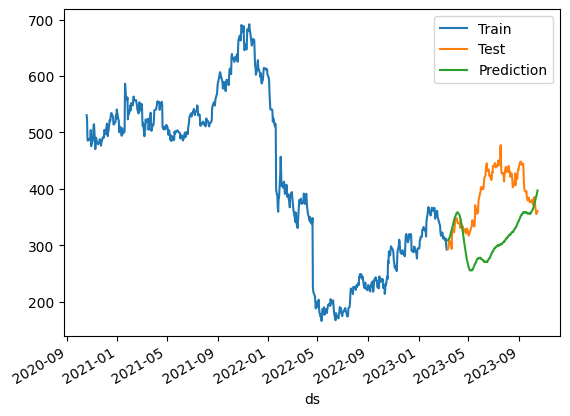

In [114]:
#Ploting of training, testing and Predicted data
plt.figure(figsize=(12,4))
ax=fb_train_data.plot(x='ds', y='y', label='Train')
fb_test_data.plot(x='ds',y='y', label='Test',ax=ax)
pred_fbp.plot(x='ds', y='yhat', label='Prediction',ax=ax)
plt.legend(loc='best')
plt.show()

In [115]:
#Errors
fbp_mape= MAPE(pred_fbp.yhat.values,fb_test_data.y.values)
fbp_rmse= RMSE(pred_fbp.yhat.values,fb_test_data.y.values)
print('MAPE = ',fbp_mape)
print('RMSE = ',fbp_rmse)

MAPE =  18.946
RMSE =  92.938


In [116]:
model=m.fit(fb_data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl5r_9_0w/bu8m2114.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl5r_9_0w/b9atg88i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51086', 'data', 'file=/tmp/tmpl5r_9_0w/bu8m2114.json', 'init=/tmp/tmpl5r_9_0w/b9atg88i.json', 'output', 'file=/tmp/tmpl5r_9_0w/prophet_modeljplyjxt7/prophet_model-20231109153624.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:36:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:36:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [117]:
future=m.make_future_dataframe(periods=20,freq='D')
forecast=m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
768,2023-11-01,470.812916,451.055583,520.187868,469.949789,471.225357,15.543979,15.543979,15.543979,-9.270275,-9.270275,-9.270275,24.814254,24.814254,24.814254,0.0,0.0,0.0,486.356895
769,2023-11-02,471.336780,453.508600,521.578155,470.196346,471.835965,15.947001,15.947001,15.947001,-8.844688,-8.844688,-8.844688,24.791690,24.791690,24.791690,0.0,0.0,0.0,487.283781
770,2023-11-03,471.860643,451.903033,519.451535,470.456419,472.472089,14.839255,14.839255,14.839255,-9.777443,-9.777443,-9.777443,24.616698,24.616698,24.616698,0.0,0.0,0.0,486.699898
771,2023-11-04,472.384506,484.298734,554.032879,470.833930,473.114553,46.904503,46.904503,46.904503,22.590053,22.590053,22.590053,24.314450,24.314450,24.314450,0.0,0.0,0.0,519.289009
772,2023-11-05,472.908369,484.695677,551.884258,471.085795,473.893626,46.500844,46.500844,46.500844,22.590036,22.590036,22.590036,23.910808,23.910808,23.910808,0.0,0.0,0.0,519.409213


In [118]:
forecast['yhat'].sum()

322054.7412082808

In [119]:
from prophet.plot import plot_plotly,plot_components_plotly
plot_plotly(m, forecast)

> Above graphs shows that the stock price will go up in coming days

In [120]:
plot_components_plotly(m,forecast)

### LSTM Model

In [121]:
def prepare_data(ts_data, n_steps):
    X,Y =list(),list()
    for i in range(len(ts_data)):
        #finding the end of this pattern
        end_ix = i+n_steps
        #check if we are beyond the seq
        if end_ix > len(ts_data)-1:
            break

        #gathering input and output
        seq_x,seq_y=ts_data[i:end_ix], ts_data[end_ix]
        X.append(seq_x)
        Y.append(seq_y)

    return np.array(X), np.array(Y)

In [122]:
#No of datapoints to taken as input
n_steps = 3
#No of features
n_features=1
#Creating sample list for train and test data
X_train, Y_train = prepare_data(train_data['Close'].tolist(), n_steps)
X_test, Y_test = prepare_data(test_data['Close'].tolist(), n_steps)

In [123]:
#First 5 Train data for LSTM
for i in range(0,5):

    print(X_train[i], Y_train[i])

[530.719971 525.419983 489.049988] 485.230011
[525.419983 489.049988 485.230011] 488.279999
[489.049988 485.230011 488.279999] 488.279999
[485.230011 488.279999 488.279999] 488.279999
[488.279999 488.279999 488.279999] 488.23999


In [124]:
X_train.shape

(871, 3)

In [125]:
Y_train.shape

(871,)

In [126]:
#reshape to 3D
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

### Hyperparameter -LSTM Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.model_selection import GridSearchCV, KFold
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

def create_model(neuron1,activation_function):
    model = Sequential()
    model.add(LSTM(neuron1, activation=activation_function, input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

def LSTM_Parameters():

  # Create the model
    model = KerasRegressor(build_fn = create_model,verbose = 0,epochs = 200)

  # Define the grid search parameters
    neuron1 = [64,32,16,8]
    activation_function = ['softmax','relu','tanh','linear']

  # Make a dictionary of the grid search parameters
    param_grids = dict(neuron1 = neuron1,activation_function = activation_function)

  # Build and fit the GridSearchCV
    grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 0)
    grid_result= grid.fit(X_train,Y_train)

  # Summarize the results
    print('Best Score : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
LSTM_Parameters()

In [128]:
#Creating Model with optimized values
lstm_model = Sequential()
lstm_model.add(LSTM(16, activation='relu', input_shape=(n_steps, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 16)                1152      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 1169 (4.57 KB)
Trainable params: 1169 (4.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [129]:
lstm_model.fit(X_train, Y_train, epochs=200, verbose=0)
pred_lstm = test_data[:-3].copy()
pred_lstm['Close'] = lstm_model.predict(X_test, verbose=0)

In [130]:
# #Predicted Values
pred_lstm.head()

,Close
Date,
2023-03-12,294.664551
2023-03-13,301.649353
2023-03-14,307.736450
2023-03-15,304.392883
2023-03-16,304.173065


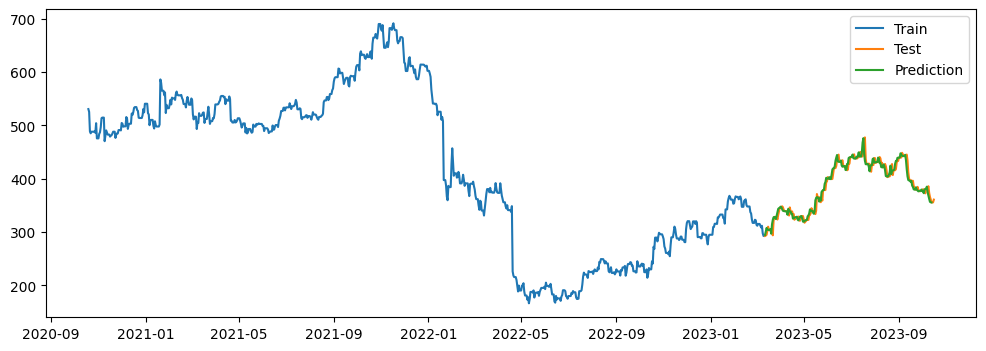

In [131]:
#Ploting of training, testing and Predicted data
plt.figure(figsize=(12,4))
plt.plot(train_data['Close'], label='Train')
plt.plot(test_data['Close'], label='Test')
plt.plot(pred_lstm['Close'], label='Prediction')
plt.legend(loc='best')
plt.show()

In [132]:
lstm_mape= MAPE(pred_lstm.Close,test_data.Close[:])
lstm_rmse= RMSE(pred_lstm.Close,test_data.Close[:])
print('MAPE = ',lstm_mape)
print('RMSE = ',lstm_rmse)

MAPE =  1.59
RMSE =  9.036


In [133]:
# demonstrate prediction for next 60 days
x_input = np.array([355.679993, 355.679993, 360.820007])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<61):

    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = lstm_model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = lstm_model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1


print(lst_output)

[359.83344]
1 day input [355.679993   360.820007   359.83343506]
1 day output [[359.49298]]
2 day input [360.820007   359.83343506 359.49298096]
2 day output [[359.39896]]
3 day input [359.83344 359.49298 359.39896]
3 day output [[359.2344]]
4 day input [359.49298 359.39896 359.2344 ]
4 day output [[359.06705]]
5 day input [359.39896 359.2344  359.06705]
5 day output [[358.90454]]
6 day input [359.2344  359.06705 358.90454]
6 day output [[358.742]]
7 day input [359.06705 358.90454 358.742  ]
7 day output [[358.57977]]
8 day input [358.90454 358.742   358.57977]
8 day output [[358.41803]]
9 day input [358.742   358.57977 358.41803]
9 day output [[358.25677]]
10 day input [358.57977 358.41803 358.25677]
10 day output [[358.09595]]
11 day input [358.41803 358.25677 358.09595]
11 day output [[357.93558]]
12 day input [358.25677 358.09595 357.93558]
12 day output [[357.77563]]
13 day input [358.09595 357.93558 357.77563]
13 day output [[357.61618]]
14 day input [357.93558 357.77563 357.6161

In [134]:
lst_output

[359.83344,
 359.49298,
 359.39896,
 359.2344,
 359.06705,
 358.90454,
 358.742,
 358.57977,
 358.41803,
 358.25677,
 358.09595,
 357.93558,
 357.77563,
 357.61618,
 357.45718,
 357.29865,
 357.14053,
 356.98285,
 356.82565,
 356.6689,
 356.51263,
 356.3568,
 356.20145,
 356.0465,
 355.892,
 355.73798,
 355.5844,
 355.43124,
 355.2786,
 355.12628,
 354.9745,
 354.82315,
 354.67227,
 354.52182,
 354.3718,
 354.22223,
 354.0731,
 353.9244,
 353.77618,
 353.62842,
 353.48105,
 353.33414,
 353.18768,
 353.04166,
 352.89606,
 352.75092,
 352.6062,
 352.46194,
 352.3181,
 352.1747,
 352.0317,
 351.88916,
 351.74707,
 351.60544,
 351.4642,
 351.32343,
 351.18304,
 351.04315,
 350.90372,
 350.76462,
 350.62604]

In [135]:
# Predicted data (assuming dates start from '2023-10-17' and are consecutive)
predicted_data = pd.DataFrame({
    'Date': pd.date_range(start='2023-10-17', periods=len(lst_output), freq='D'),
    'Close': lst_output})
predicted_data.head()

,Date,Close
0,2023-10-17,359.833435
1,2023-10-18,359.492981
2,2023-10-19,359.398956
3,2023-10-20,359.234406
4,2023-10-21,359.067047


In [136]:
predicted_data.set_index('Date',inplace=True)
predicted_data.index.date

array([datetime.date(2023, 10, 17), datetime.date(2023, 10, 18),
       datetime.date(2023, 10, 19), datetime.date(2023, 10, 20),
       datetime.date(2023, 10, 21), datetime.date(2023, 10, 22),
       datetime.date(2023, 10, 23), datetime.date(2023, 10, 24),
       datetime.date(2023, 10, 25), datetime.date(2023, 10, 26),
       datetime.date(2023, 10, 27), datetime.date(2023, 10, 28),
       datetime.date(2023, 10, 29), datetime.date(2023, 10, 30),
       datetime.date(2023, 10, 31), datetime.date(2023, 11, 1),
       datetime.date(2023, 11, 2), datetime.date(2023, 11, 3),
       datetime.date(2023, 11, 4), datetime.date(2023, 11, 5),
       datetime.date(2023, 11, 6), datetime.date(2023, 11, 7),
       datetime.date(2023, 11, 8), datetime.date(2023, 11, 9),
       datetime.date(2023, 11, 10), datetime.date(2023, 11, 11),
       datetime.date(2023, 11, 12), datetime.date(2023, 11, 13),
       datetime.date(2023, 11, 14), datetime.date(2023, 11, 15),
       datetime.date(2023, 11, 16)

In [137]:
# predicted_data = pd.Series(lst_output, index=pd.date_range(start='2023-01-17', periods=len(lst_output), freq='D'), name='Close')
# predicted_data

In [138]:
predicted_data.head()

,Close
Date,
2023-10-17,359.833435
2023-10-18,359.492981
2023-10-19,359.398956
2023-10-20,359.234406
2023-10-21,359.067047


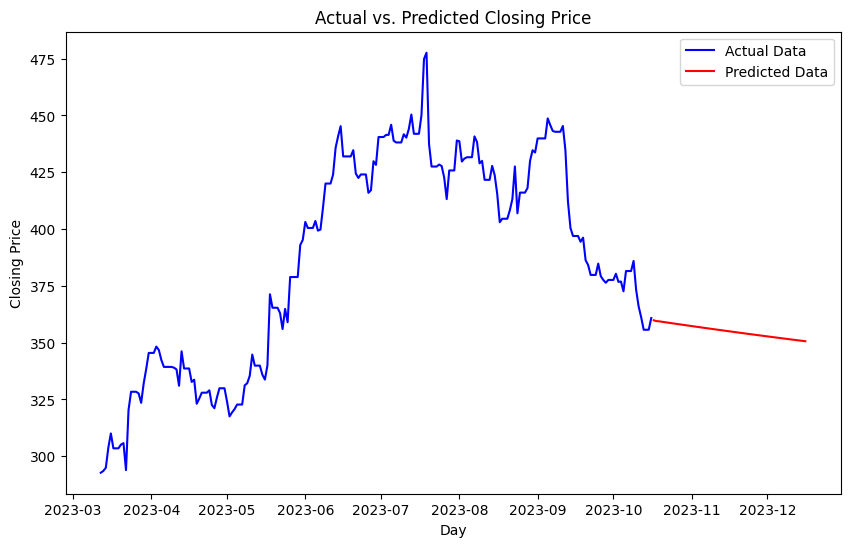

In [139]:
import matplotlib.pyplot as plt

# Create a figure with one subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the actual training data
ax.plot(test_data['Close'], label='Actual Data', color='blue')

# Plot the predicted values for the next 10 days
ax.plot(predicted_data, label='Predicted Data', color='red')

# Add labels and legend
ax.set_xlabel('Day')
ax.set_ylabel('Closing Price')
ax.set_title('Actual vs. Predicted Closing Price')
ax.legend()

plt.show()


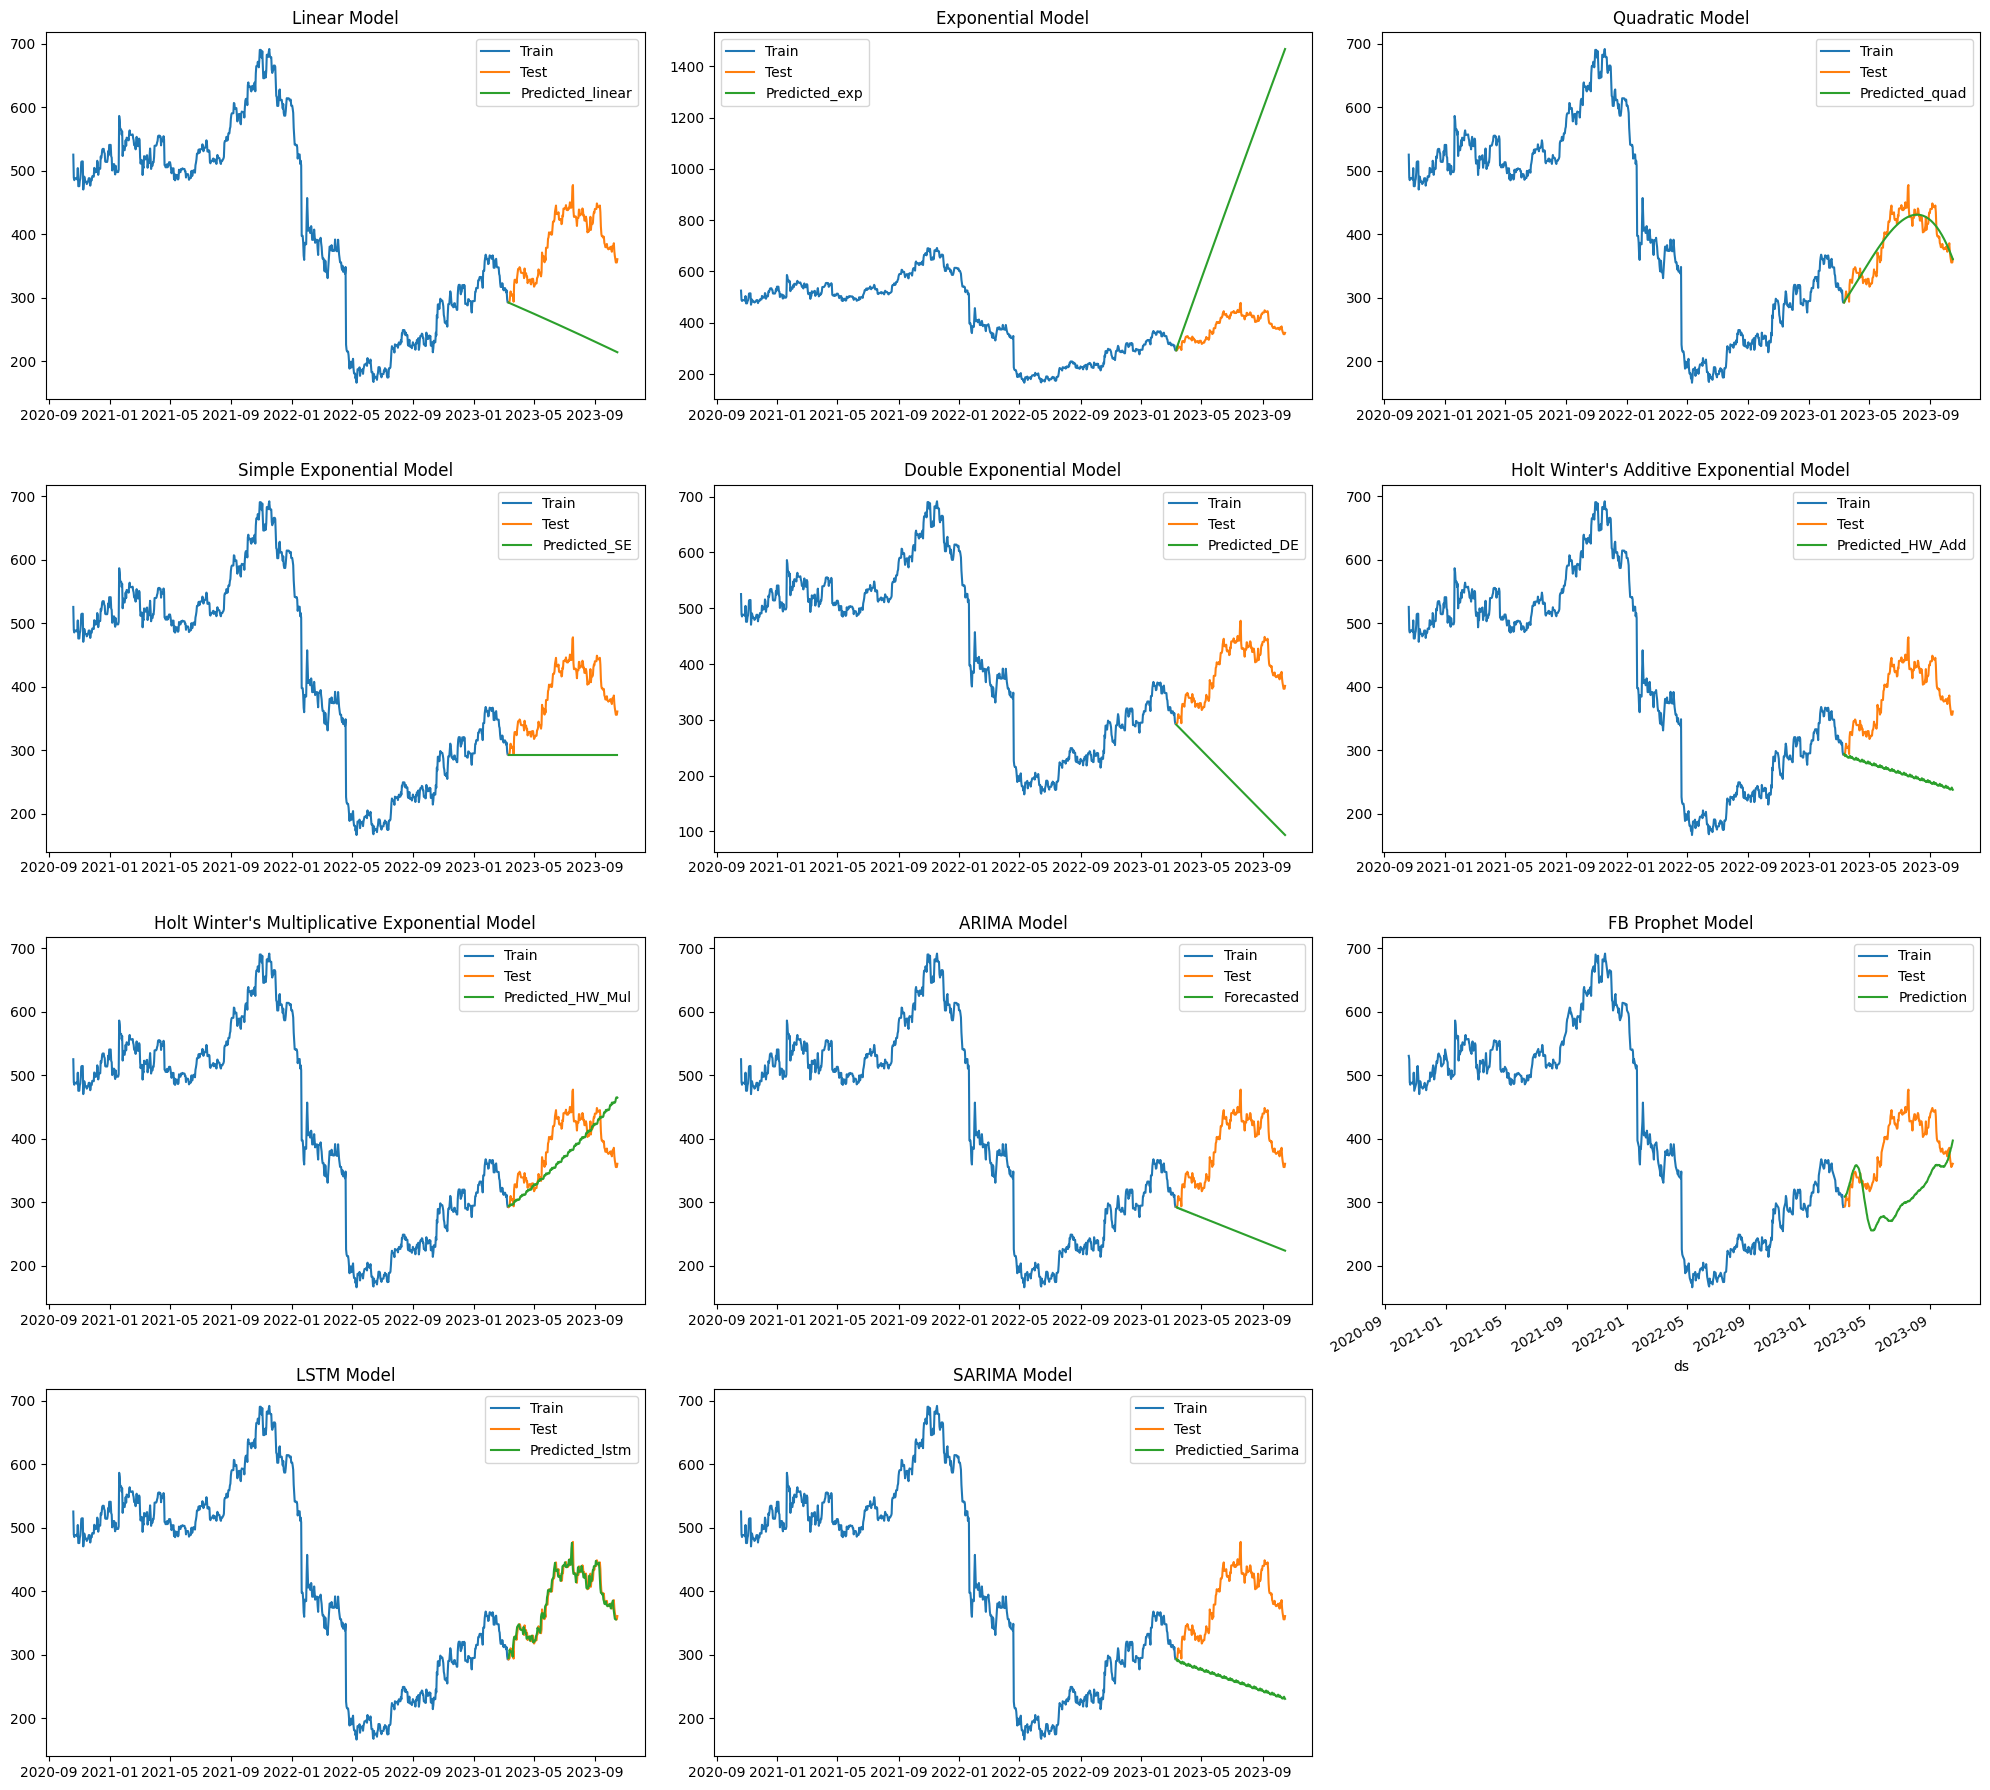

In [140]:
import matplotlib.pyplot as plt

# Create a figure with 4 rows and 3 columns of subplots
fig, axes = plt.subplots(4, 3, figsize=(20, 18))

# Plotting Linear Model
axes[0, 0].plot(diff_train_data['Close'], label='Train')
axes[0, 0].plot(diff_test_data['Close'], label='Test')
axes[0, 0].plot(pred_linear, label='Predicted_linear')
axes[0, 0].legend(loc='best')
axes[0, 0].set_title('Linear Model')

# Plotting Exponential Model
axes[0, 1].plot(diff_train_data['Close'], label='Train')
axes[0, 1].plot(diff_test_data['Close'], label='Test')
axes[0, 1].plot(pred_exp, label='Predicted_exp')
axes[0, 1].legend(loc='best')
axes[0, 1].set_title('Exponential Model')

# Plotting Quadratic Model
axes[0, 2].plot(diff_train_data['Close'], label='Train')
axes[0, 2].plot(diff_test_data['Close'], label='Test')
axes[0, 2].plot(pred_quad, label='Predicted_quad')
axes[0, 2].legend(loc='best')
axes[0, 2].set_title('Quadratic Model')

# Plotting Simple Exponential Model
axes[1, 0].plot(diff_train_data['Close'], label='Train')
axes[1, 0].plot(diff_test_data['Close'], label='Test')
axes[1, 0].plot(pred_se, label='Predicted_SE')
axes[1, 0].legend(loc='best')
axes[1, 0].set_title('Simple Exponential Model')

# Plotting Double Exponential Model
axes[1, 1].plot(diff_train_data['Close'], label='Train')
axes[1, 1].plot(diff_test_data['Close'], label='Test')
axes[1, 1].plot(pred_de, label='Predicted_DE')
axes[1, 1].legend(loc='best')
axes[1, 1].set_title('Double Exponential Model')

# Plotting Holt Winter's Additive Exponential Model
axes[1, 2].plot(diff_train_data['Close'], label='Train')
axes[1, 2].plot(diff_test_data['Close'], label='Test')
axes[1, 2].plot(pred_hwe_add_add, label='Predicted_HW_Add')
axes[1, 2].legend(loc='best')
axes[1, 2].set_title("Holt Winter's Additive Exponential Model")

# Plotting Holt Winter's Multiplicative Exponential Model
axes[2, 0].plot(diff_train_data['Close'], label='Train')
axes[2, 0].plot(diff_test_data['Close'], label='Test')
axes[2, 0].plot(pred_hwe_mul_mul, label='Predicted_HW_Mul')
axes[2, 0].legend(loc='best')
axes[2, 0].set_title("Holt Winter's Multiplicative Exponential Model")

# Plotting ARIMA Model
axes[2, 1].plot(diff_train_data['Close'], label='Train')
axes[2, 1].plot(diff_test_data['Close'], label='Test')
axes[2, 1].plot(forecasted_data, label='Forecasted')
axes[2, 1].legend(loc='best')
axes[2, 1].set_title('ARIMA Model')

# Plotting FB Prophet Model (Note: There's a small issue with this part)
fb_train_data.plot(x='ds', y='y', label='Train', ax=axes[2, 2])
fb_test_data.plot(x='ds', y='y', label='Test', ax=axes[2, 2])
axes[2, 2].plot(pred_fbp['ds'], pred_fbp['yhat'], label='Prediction')
axes[2, 2].legend(loc='best')
axes[2, 2].set_title('FB Prophet Model')

# Plotting LSTM Model
axes[3, 0].plot(diff_train_data['Close'], label='Train')
axes[3, 0].plot(diff_test_data['Close'], label='Test')
axes[3, 0].plot(pred_lstm, label='Predicted_lstm')
axes[3, 0].legend(loc='best')
axes[3, 0].set_title('LSTM Model')

# Plotting SARIMA Model
axes[3, 1].plot(diff_train_data['Close'], label='Train')
axes[3, 1].plot(diff_test_data['Close'], label='Test')
axes[3, 1].plot(predictions, label='Predictied_Sarima')
axes[3, 1].legend(loc='best')
axes[3, 1].set_title('SARIMA Model')

# Remove the empty subplot in the last row
fig.delaxes(axes[3, 2])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the combined figure
plt.show()


### Results

In [141]:
result = {"Models":pd.Series(["Linear","Exponential","Quadratic","Simple Exponential","Double Exponential","Holt Winter's Additive",
                             "Holt Winter's Multiplicative", "Arima","Sarima",'Prophet','LSTM']),
          "RMSE_Values":pd.Series([linear_rmse,exp_rmse,quad_rmse,se_rmse,de_rmse,hwe_add_rmse,hwe_mul_rmse,arima_rmse,sarima_rmse,fbp_rmse,lstm_rmse]),
         "MAPE_Values":pd.Series([linear_mape,exp_mape,quad_mape,se_mape,de_mape,hwe_add_mape,hwe_mul_mape,arima_mape,sarima_mape,fbp_mape,lstm_mape])}
comibe_result=pd.DataFrame(result)
comibe_result.sort_values(['RMSE_Values'], inplace=True, ignore_index=True)

In [142]:
comibe_result

,Models,RMSE_Values,MAPE_Values
0,LSTM,9.036,1.590
1,Quadratic,18.710,4.046
2,Holt Winter's Multiplicative,45.907,9.278
3,Prophet,92.938,18.946
4,Simple Exponential,104.878,23.172
5,Holt Winter's Additive,134.655,30.108
6,Sarima,139.106,31.189
7,Arima,142.659,31.968
8,Linear,147.011,32.849
9,Double Exponential,215.916,48.268


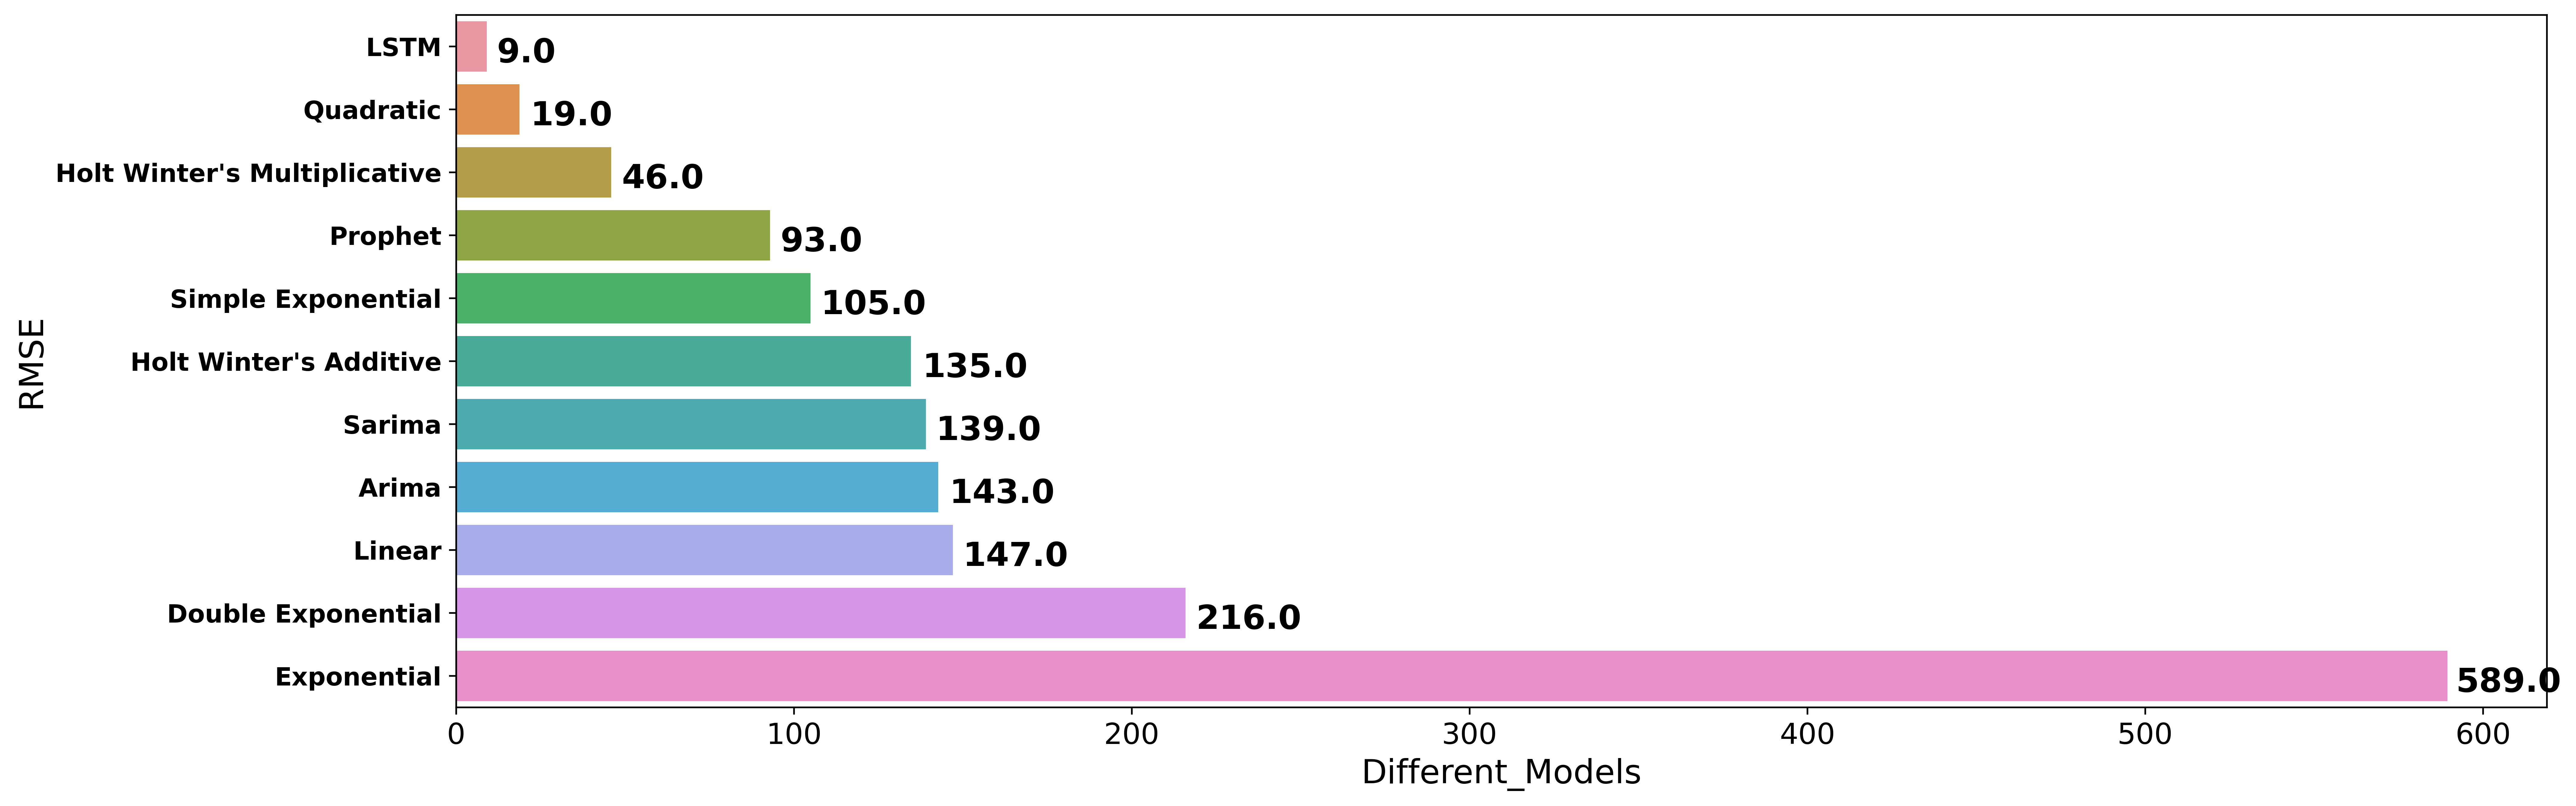

In [143]:
f, axe = plt.subplots(1,1, figsize=(18,6), dpi=500)
sns.barplot(x='RMSE_Values', y='Models', data=comibe_result, ax = axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('RMSE', size=16)
plt.yticks(fontsize=12,fontweight = 'bold')
plt.xticks(fontsize=14)


for i, v in enumerate(np.round(comibe_result.RMSE_Values.values,0)):
    axe.text(v + 3, i + .25, str(v),
            color = 'black', fontweight = 'bold', fontsize= 16)

plt.show()

#### Conclusion:
## <p style="color:black;font-size:18;"></p><p style="color:black;font-size:14px;">The best model we have got so far with the lowest RMSE and lowest MAPE is LSTM and Quadratic.</p>    
## <p style="color:black;font-size:18;"></p><p style="color:black;font-size:14px;"> To predict the Company Stock Price LSTM model should be used. </p>    

### Final Model

In [ ]:
n_steps=3
X, Y = prepare_data(stock_price['Close'].tolist(), n_steps)


#Reshaping of datapoints as per required input of LSTM model
X = X.reshape((X.shape[0], X.shape[1], 1))

In [ ]:
#Creating Model
n_features=1
lstm_model = Sequential()
lstm_model.add(LSTM(32, activation='relu', input_shape=(n_steps, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X, Y, epochs=200, verbose=0)
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 32)                4352      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [ ]:
pred_lstm = test_data[:-3].copy()
pred_lstm['Close'] = lstm_model.predict(X_test, verbose=0)
rmse= RMSE(pred_lstm.Close,test_data.Close[:-3])
print('RMSE of the model : ', rmse)

RMSE of the model :  6.918


In [ ]:
df = pd.DataFrame(predicted_data)
csv_file_path = "predicted_values.csv"
df.to_csv(csv_file_path, index=True)